# The Neural Dynamics of Valence and Intensity Encoding in the Amygdala and Prefrontal Cortex

**Authors:** Rahim Hashim, Roberto Gulli, Stefano Fusi, Daniel Salzman <br>
**Notebook Owner:** Rahim Hashim (rh2898@columbia.edu) <br>
***

## Import Libraries and Setting Path Variables

Make sure that all the libraries specified in environment.yaml are installed (see [pip](https://packaging.python.org/en/latest/tutorials/installing-packages/) documentation for more info). The structure of the directory should be:
```
ROOT
│
└───data
│   │
│   └─── raw
│   │    │   data_<TASK>
│   └─── processed
│   │    │   data_<TASK>
│   └─── _fractals
│       │   <YYYYMMDD>
│
└─── tasks
    │
    └─── <EXPERIMENT>
        │   
        └─── <TASK>  
            │   <videos>     

```

In [73]:
!bash move_files.sh

Current directory is:
  /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice
Target path is:
  data_Probabilistic_Reward_Airpuff_Choice/
Searching for Aragorn for 230828
  Moving : 230828_Aragorn_choice.h5
  Moved  : 230828_Aragorn_choice.h5
Total number of files moved: 1
Fractal folder is: 20230828
Copied fractal folder to all fractals folder


In [78]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict
# Custom classes
from classes.Path import Path
from classes.Session import Session
# pandas options
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)

# Assign paths
ROOT = '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/'
EXPERIMENT = 'rhAirpuff'
TASK = 'Probabilistic_Reward_Airpuff_Choice' # Probabalistic_Airpuff_4x2 | Probabilistic_Reward_Airpuff_5x2 | Probabilistic_Reward_Airpuff_Choice

path_obj = Path(ROOT, EXPERIMENT, TASK)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Raw Data Path Exists: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice
  Number of Total Files  : 93
  Monkey: Aragorn
    Number of Aragorn Files : 50
    Earliest Date    : 230523
    Most Recent Date : 230828
  Monkey: Bear
    Number of Bear Files : 31
    Earliest Date    : 230608
    Most Recent Date : 230824
Video Path Exists: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos
Pulling '.h5' files...
  Complete: 87 '.h5' files pulled


***
## Specifying Session and Analyses Parameters
Choose the date(s) and monkey(s) that you'd like to include in your analysis. 
> `reprocess_data` <br>
> * `True` : generates (or regenerates) the session_df DataFrame from `data/raw` data <br>
> * `False` : loads the pickled session_df DataFrame from the `data/processed` data directory

> `save_df` <br>
> * `True` : pickles the generated session_df DataFrame and saves it in the `data/processed` data directory
> * `False` : does not pickle the session_df DataFrame

> `combine_dates` <br>
> * `True` : runs all analyses on a combined DataFrame and saves figures for all sessions
> * `False` : does not combine analyses and generates new figures for each date

In [79]:
# Custom modules
from config import preprocess_helper

# Specifying date/monkey/task
start_date = '2023-07-20' #@param {type:"date"}
end_date = '2023-07-20' #@param {type:"date"}
monkey_input = 'Aragorn' #@param ['Aragorn', 'Gandalf', 'Rob', 'Test']
reprocess_data = True #@param {type:"boolean"}
save_df =  True #@param {type:"boolean"}
combine_dates =  True #@param {type:"boolean"}

# Parse data
session_df, session_obj, error_dict, behavioral_code_dict\
	= preprocess_helper.preprocess_data(path_obj,
																			start_date,
																			end_date,
																			monkey_input,
																			TASK,
																			reprocess_data,
																			save_df,
																			combine_dates)

session_df_correct = session_df[session_df['correct'] == 1]

Loading selected file(s):
  230720_Aragorn_choice.h5 - Completed
Converting .h5 to python:
  <HDF5 file "230720_Aragorn_choice.h5" (mode r)>
Parsing .h5 file...
  Cam 1 assigned
  Cam 2 assigned
  Trial and Camera numbers matched.
Total number of trials: 558
  Choice task detected.
Parsing session data...


  0%|          | 0/558 [00:00<?, ?it/s]

  cam_frame removed from session_dict
    0 trials in field != 558 trials in session
  Complete.
    Correct trials: 421
    Errored trials: 137
    Session Length:  01:37:29
Parsing camera data...


  0%|          | 0/558 [00:00<?, ?it/s]

  Complete.


  0%|          | 0/558 [00:00<?, ?it/s]

  Complete.
Creating Session Objects...
Lick threshold: 3.76 mV
  Min Values (X,Y): (-25.349,-47.137)
  Max Values (X,Y): (85.266,117.004)
  Reward Mag: 1.0
    Reward Drops: 10.0
    Reward Frequency: 1.0
    Reward Length: 220.0
  Reward Mag: 0.5
    Reward Drops: 5.0
    Reward Frequency: 1.0
    Reward Length: 200.0
  Reward Mag: 0.0
    Reward Drops: 0.0
    Reward Frequency: 0.0
    Reward Length: 0.0
  Airpuff Mag: 1.0
    Airpuff Magnitude: 1.0
    Airpuff Frequency: 1.0
  Airpuff Mag: 0.5
    Airpuff Magnitude: 0.5
    Airpuff Frequency: 0.5
  Airpuff Mag: 0.0
    Airpuff Magnitude: 0.0
    Airpuff Frequency: 0.0
Adding additional fields to session_df DataFrame...


/Users/rahimhashim/Desktop/Monkey-Behavior/config/add_fields.py:335: RuntimeWarning: Mean of empty slice
  lick_avg = np.nanmean(lick_in_window)


  20 new fields added.
Saving .pickle files to: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/processed/processed_Probabilistic_Reward_Airpuff_Choice
  Pickling 230720_Aragorn_Probabilistic_Reward_Airpuff_5x2_behave.pkl
  Total time to pickle: 0.4064 sec
Looking for images from: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/_fractals/20230720
 Saving figures to: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/figures/20230720_Aragorn
  _fractals.png saved.
Save folder for combined dates: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/figures/20230720_Aragorn
  Index(['date', 'session_num', 'subject', 'trial_num', 'block', 'condition',
         'correct', 'error', 'error_type', 'behavioral_code_markers',
         'behavioral_code_times', 'stimuli_name_1', 'x_1_pos', 'y_1_pos',
         'stimuli_name_2', 'x_2_pos', 'y_2_pos', 're

### View DataFrame Headers

Peek into the session_df DataFrame to see the fields included.

In [80]:
pd.set_option('display.max_columns', None)
session_df_correct.head(5)

date  session_num  subject  trial_num  block  condition  correct  error   
0  230720            0  Aragorn          1      1          1        1      0  \
1  230720            0  Aragorn          2      1          1        1      0   
3  230720            0  Aragorn          4      1          1        1      0   
7  230720            0  Aragorn          8      1          1        1      0   
8  230720            0  Aragorn          9      1          1        1      0   

   error_type                            behavioral_code_markers   
0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...  \
1           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
3           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
7           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
8           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   

                               behavioral_code_times stimuli_name_1 x_1_pos   
0  [5.369700000301236, 101.68520000024728, 229.05...     _fractal_B   [0.0]  \
1  [1964.9410000001808, 1982.5647999996363, 2051....     _fractal_D  [-5.0]   
3  [1965.8140999999887, 1978.0123999998978, 2036....     _fractal_B   [0.0]   
7  [1965.4590000000098, 1973.0498999997508, 2036....     _fractal_A   [0.0]   
8  [2595.3582000001916, 2602.3943000000145, 2670....     _fractal_D   [0.0]   

  y_1_pos stimuli_name_2 x_2_pos y_2_pos  reward_1  reward_prob_1   
0   [0.0]     _fractal_B   [0.0]   [0.0]         1            1.0  \
1   [0.0]     _fractal_E   [5.0]   [0.0]         0            0.0   
3   [0.0]     _fractal_B   [0.0]   [0.0]         1            1.0   
7   [0.0]     _fractal_A   [0.0]   [0.0]         1            1.0   
8   [0.0]     _fractal_D   [0.0]   [0.0]         0            0.0   

   reward_mag_1  reward_drops_1  reward_length_1  reward_2  reward_prob_2   
0           0.5             5.0            200.0         0            0.0  \
1           0.0             0.0              0.0         0            0.0   
3           0.5             5.0            200.0         0            0.0   
7           1.0            10.0            220.0         0            0.0   
8           0.0             0.0              0.0         0            0.0   

   reward_mag_2  airpuff_1  airpuff_prob_1  airpuff_mag_1  airpuff_2   
0           0.0          0             0.0            0.0          0  \
1           0.0          1             0.5            0.5          1   
3           0.0          0             0.0            0.0          0   
7           0.0          0             0.0            0.0          0   
8           0.0          1             0.5            0.5          0   

   airpuff_prob_2  airpuff_mag_2   
0             0.0            0.0  \
1             1.0            1.0   
3             0.0            0.0   
7             0.0            0.0   
8             0.0            0.0   

                                               eye_x   
0  [-21.68994593303172, -21.68994593303172, -21.7...  \
1  [1.3440706538070724, 1.3563852976058548, 1.356...   
3  [3.515401226137058, 3.515401226137058, 3.44544...   
7  [1.80299286388821, 1.8512386858216792, 1.85123...   
8  [0.9672738127265824, 0.9678393855693669, 0.967...   

                                               eye_y   
0  [-12.454848763349972, -12.454848763349972, -12...  \
1  [-3.8756732844884967, -3.9265270027672092, -3....   
3  [-9.627850526873942, -9.627850526873942, -9.63...   
7  [-11.706225383840243, -11.728308531130477, -11...   
8  [-4.018358379723451, -4.027699184404874, -4.02...   

                                           eye_pupil   
0  [6887.0, 6887.0, 6889.0, 6889.0, 6889.0, 6889....  \
1  [7407.0, 7405.0, 7405.0, 7406.0, 7406.0, 7406....   
3  [7155.0, 7155.0, 7142.0, 7142.0, 7133.0, 7133....   
7  [7458.0, 7444.0, 7444.0, 7435.0, 7435.0, 7435....   
8  [7307.0, 7306.0, 7306.0, 7306.0, 7306.0, 7308....   

                                                lick   
0  [0.0062533447719864965, 0.0052668630946227

***
## Run Analyses

`run_functions` performs all the analyses on session_df.

  perf_by_fractal.png saved.


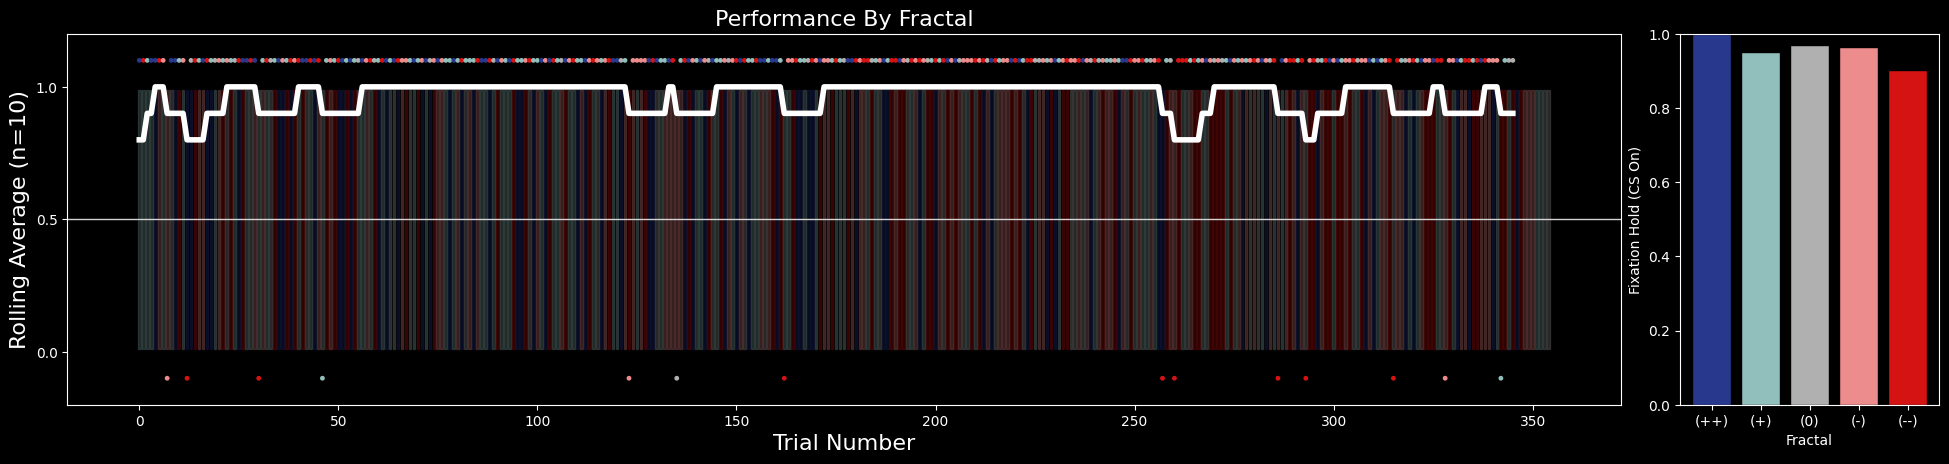

  session_latency.png saved.


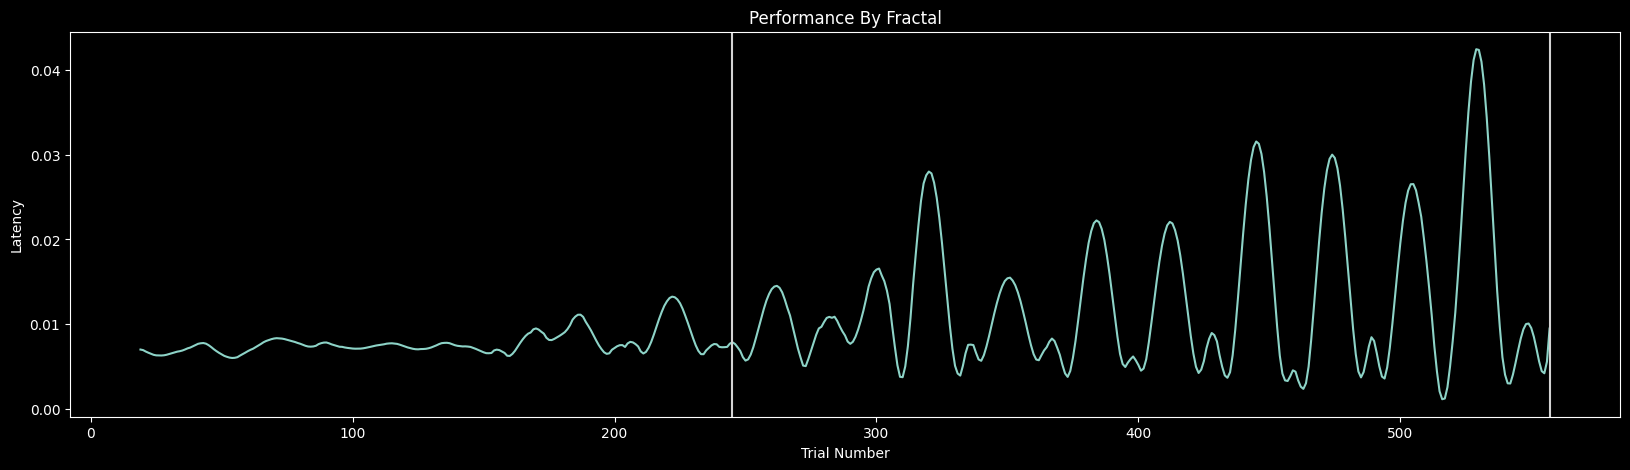

  epoch_hist.png saved.


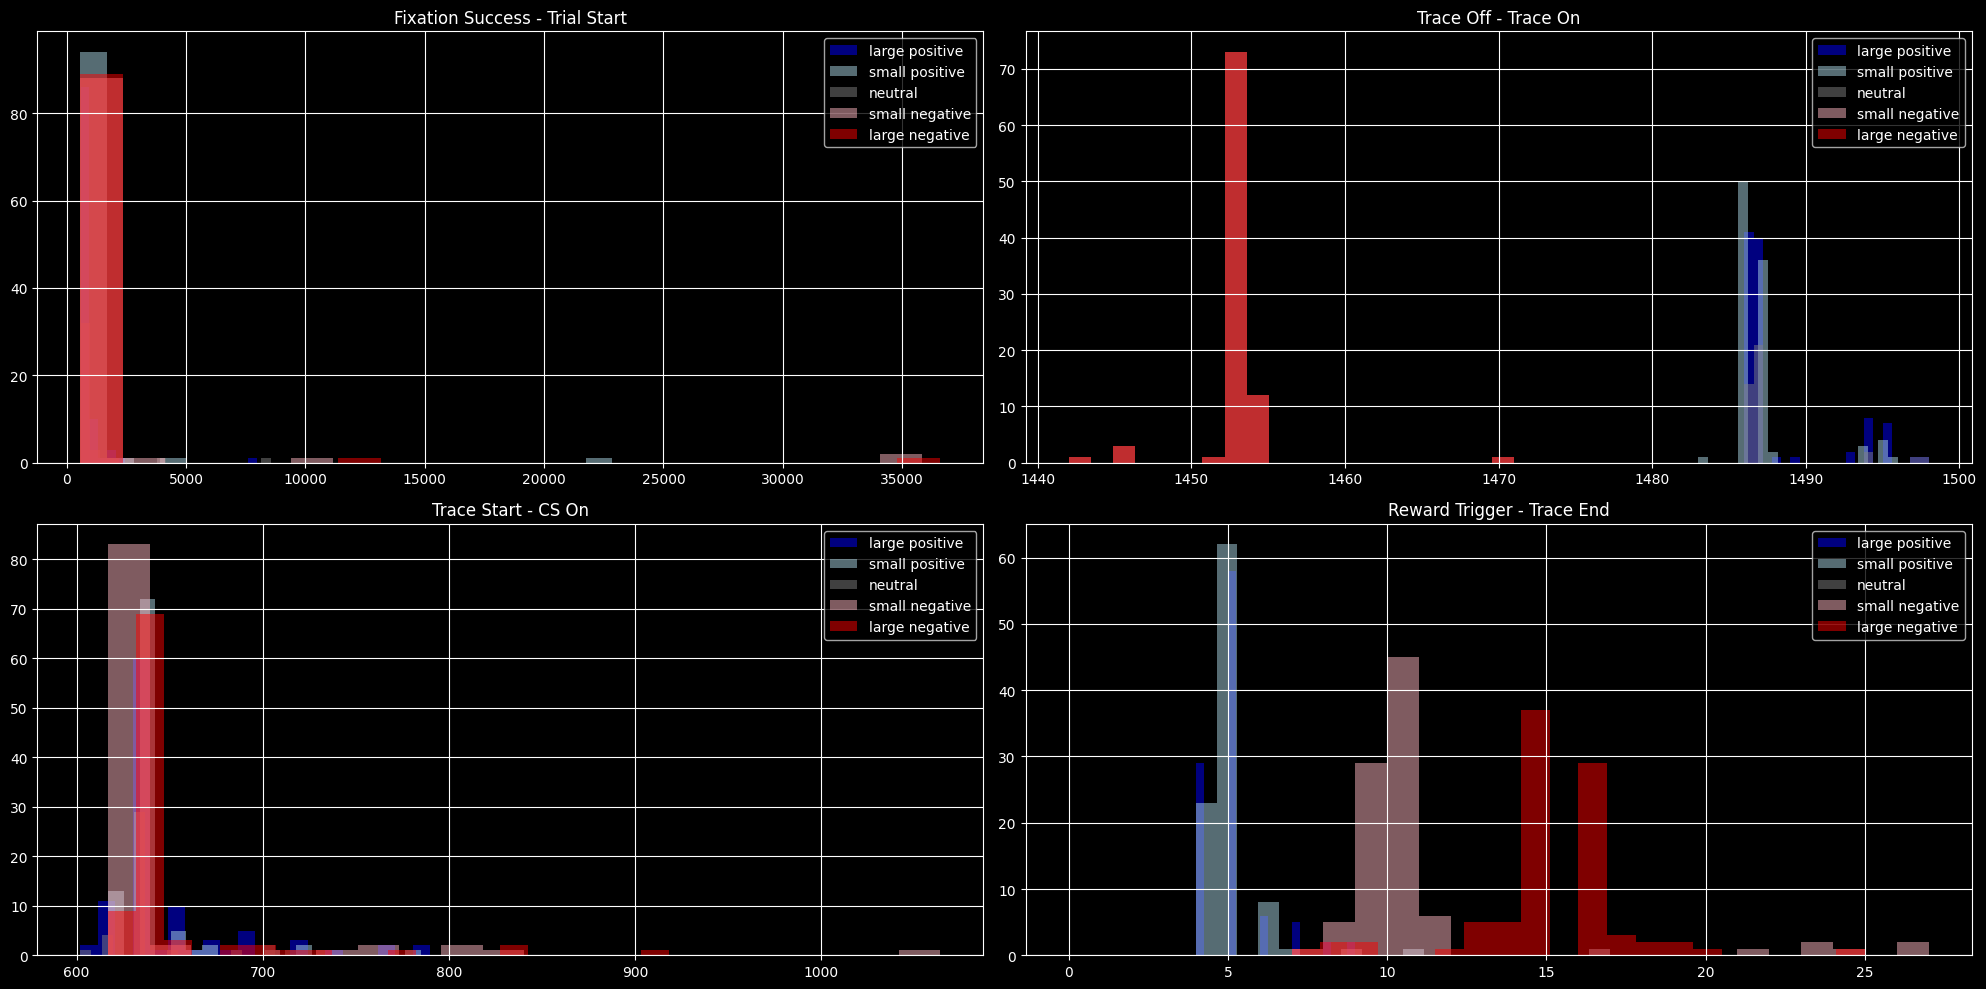

  session_lick_avg.png saved.
  session_blink_avg.png saved.
  fractal_lick_raster.png saved.
  fractal_blink_raster.png saved.
  raster_by_cond_1.png saved.
  t_test_lick-duration_1.png saved.


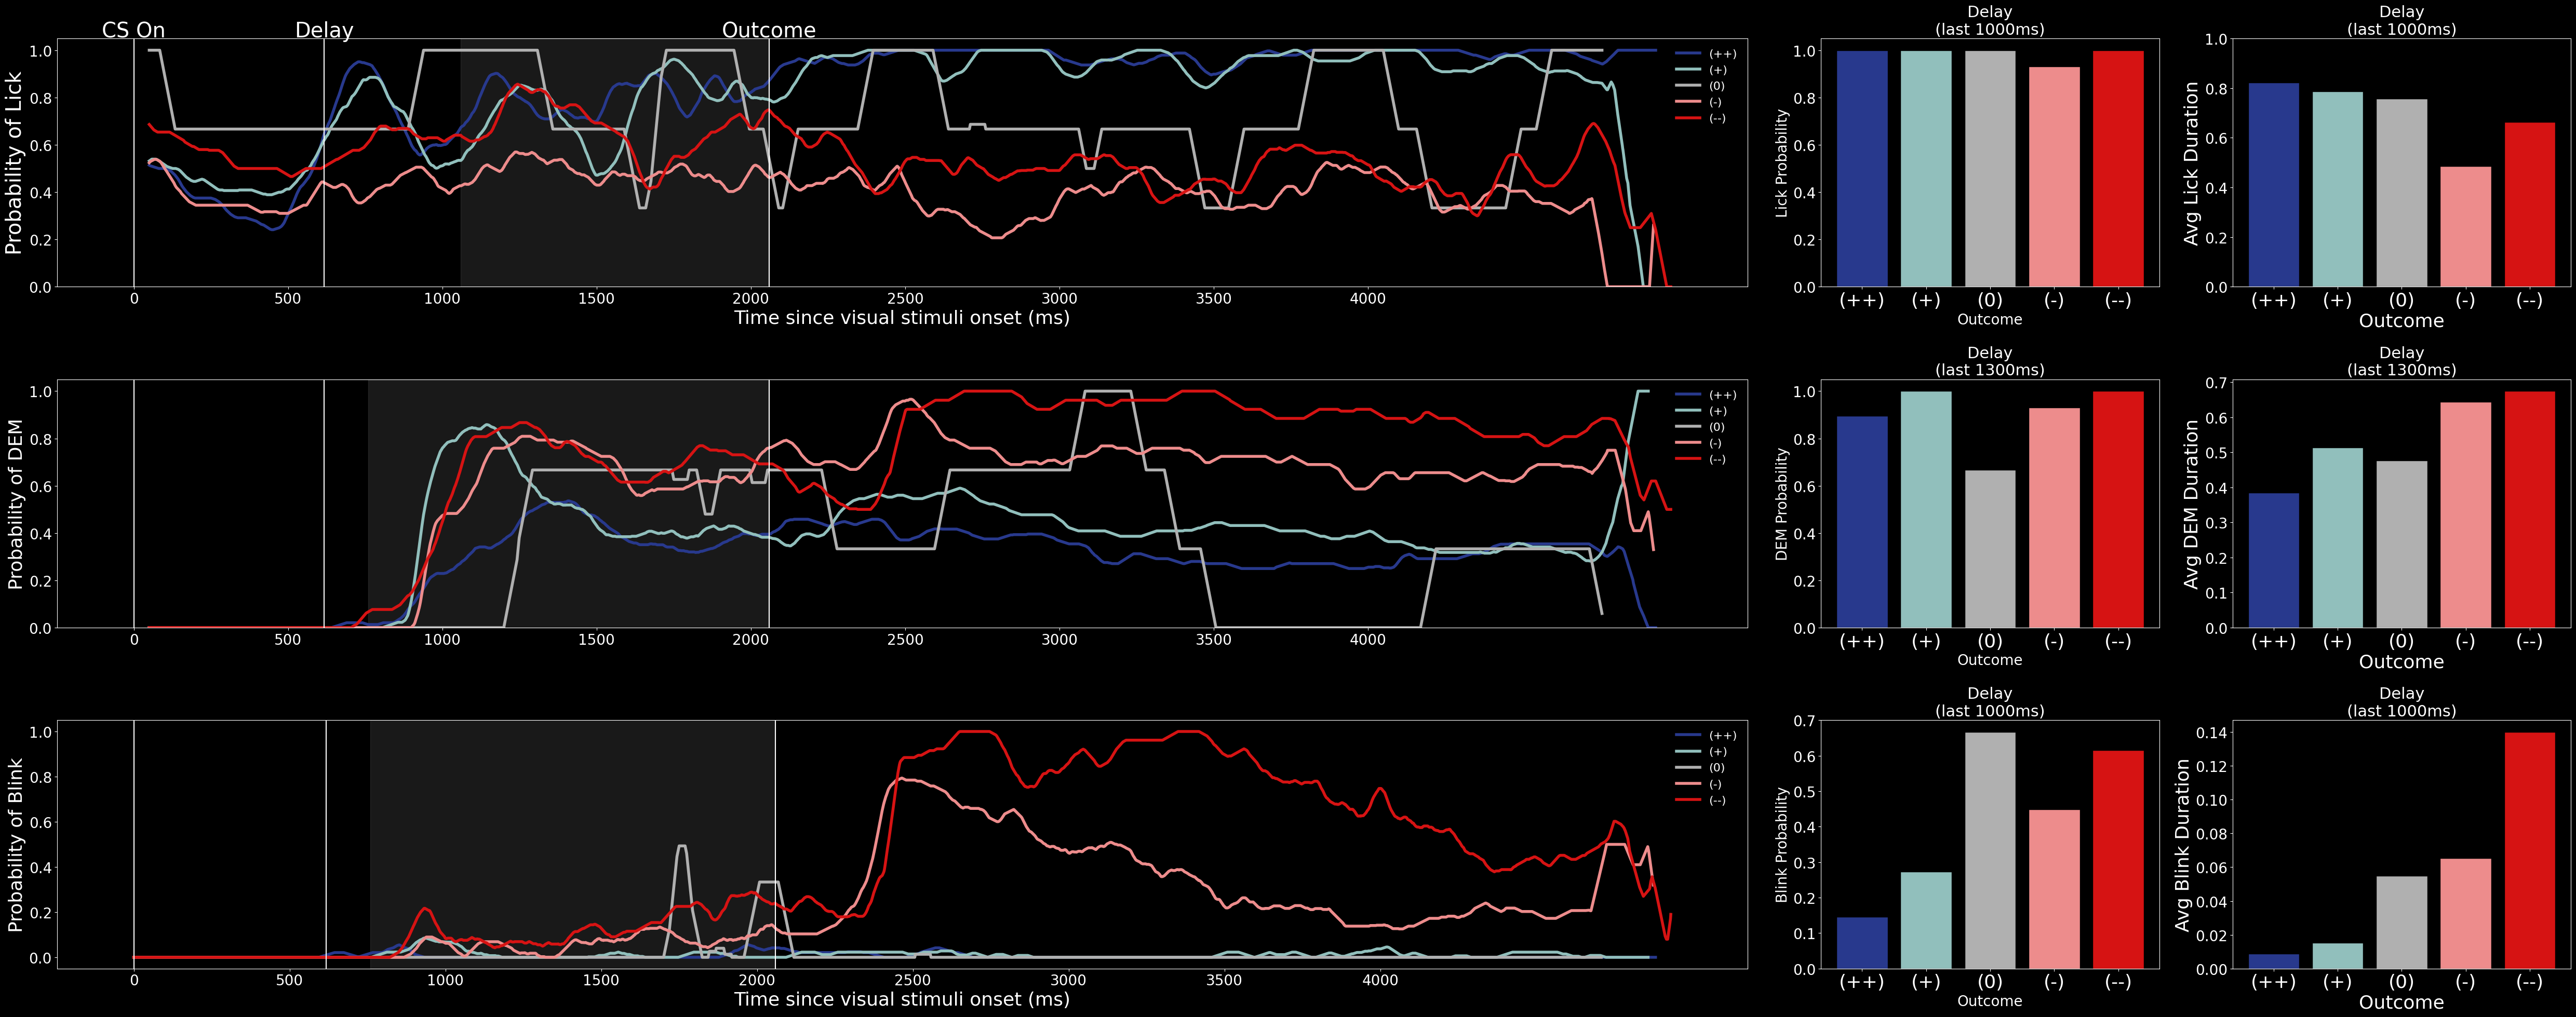

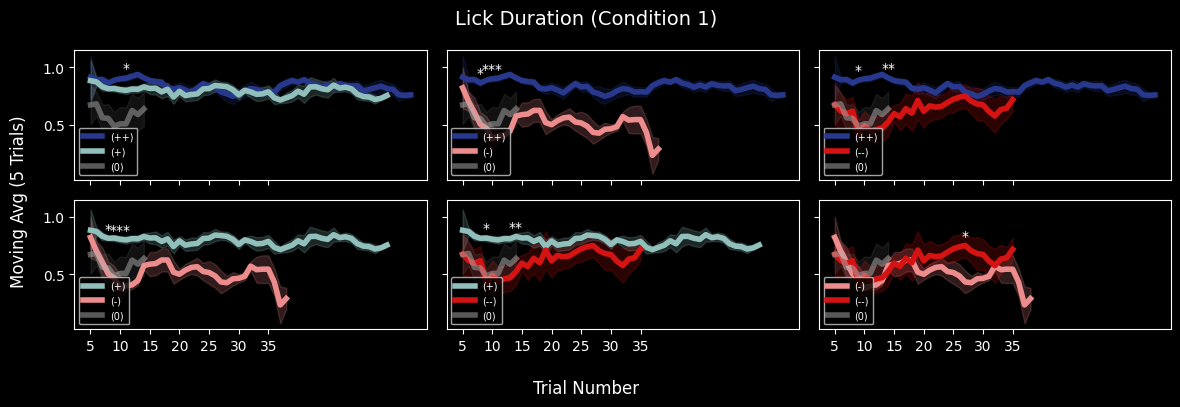

  t_test_DEM-duration_1.png saved.


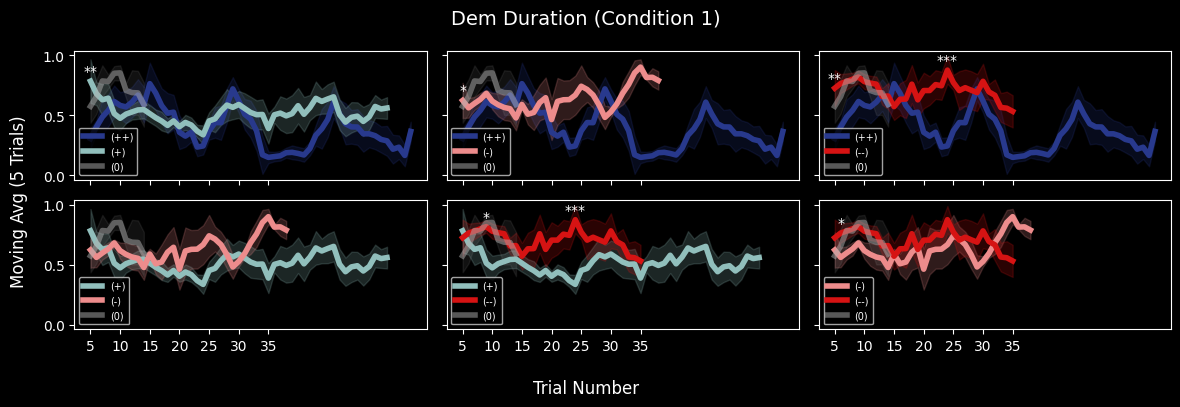

  t_test_blink-duration_1.png saved.


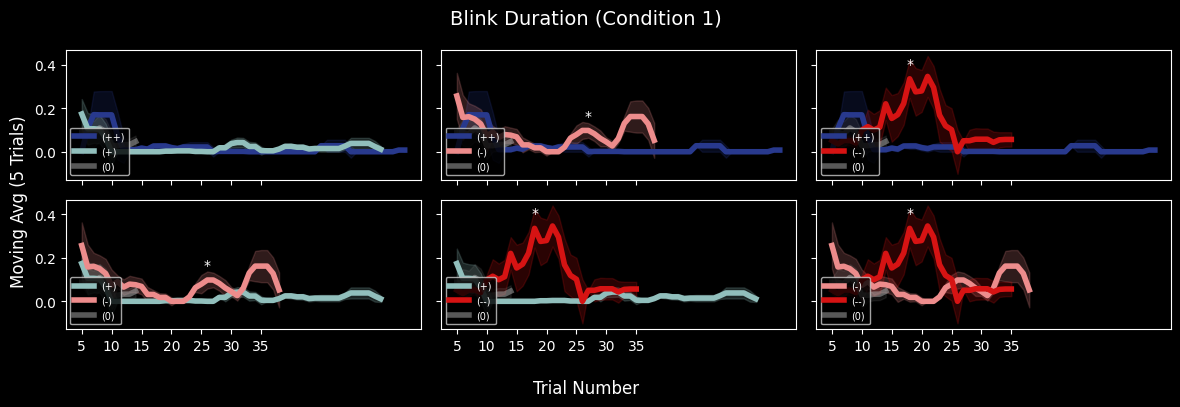

  raster_by_cond_2.png saved.
  t_test_lick-duration_2.png saved.


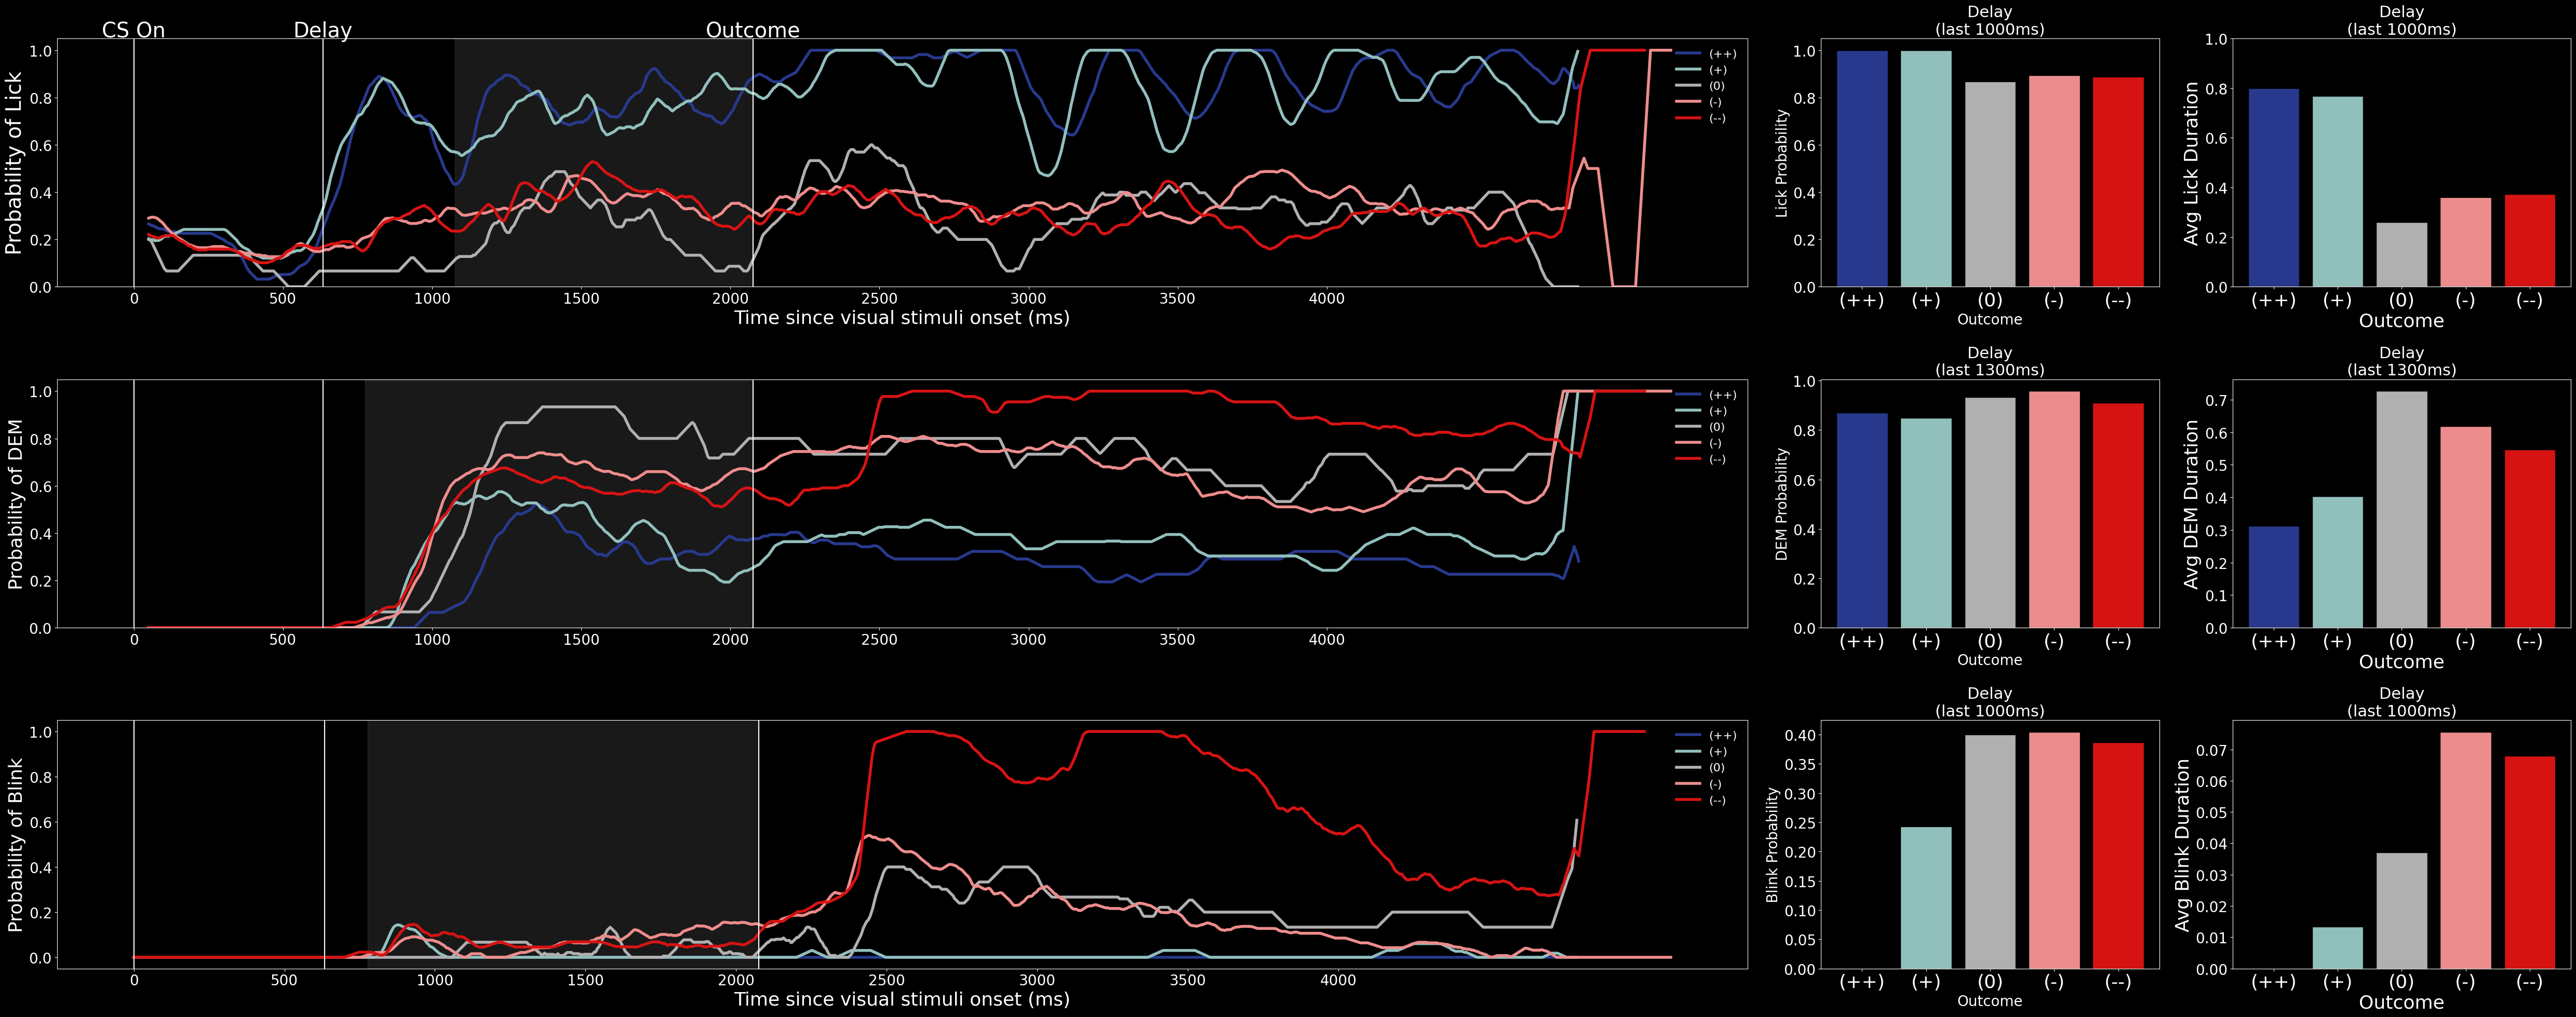

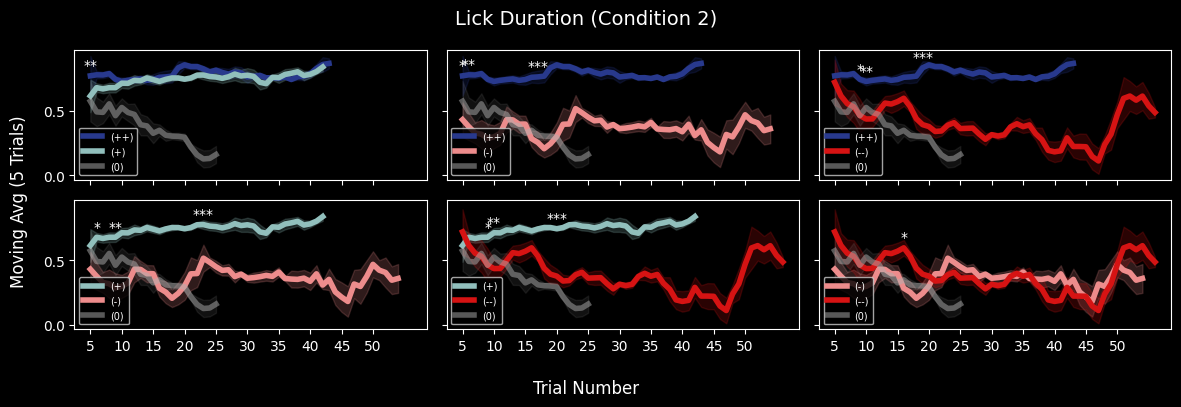

  t_test_DEM-duration_2.png saved.


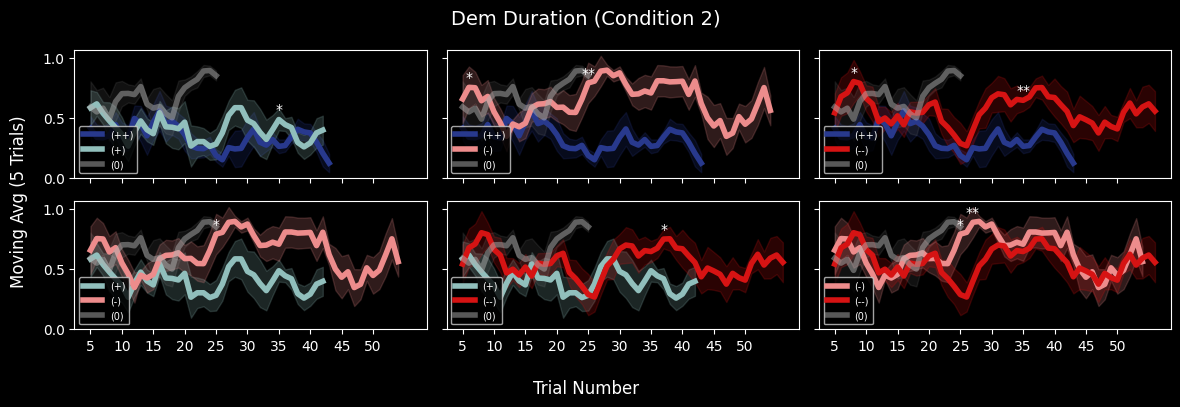

  t_test_blink-duration_2.png saved.


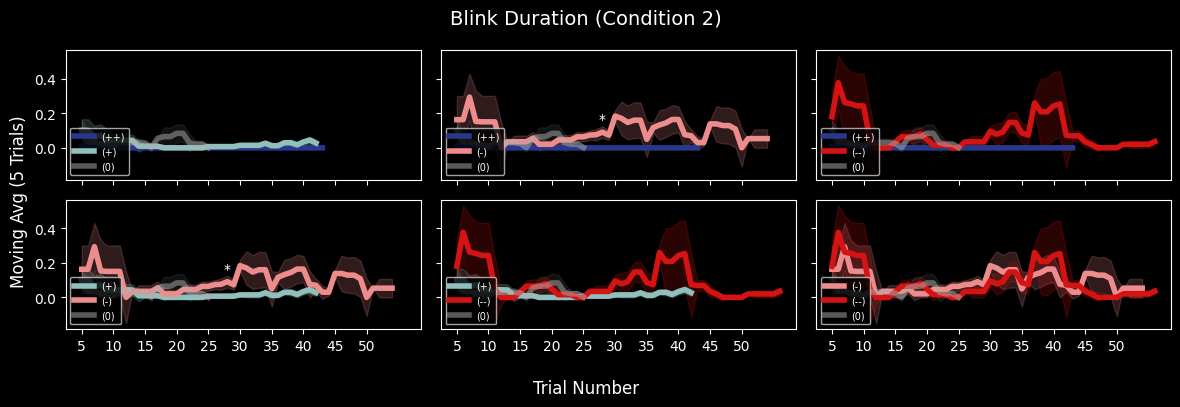

Total Eye Positions: 118500
Histogram Positions: 117767
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.0001 0.0629 0.0107 0.     0.0037 0.    ]
 [0.0032 0.0056 0.0078 0.1848 0.4348 0.0549 0.     0.    ]
 [0.     0.0009 0.0245 0.0263 0.1176 0.0281 0.     0.    ]
 [0.     0.0001 0.0057 0.0269 0.0015 0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]]
outside x,y [-10, 10]: 30.68%
outside x,y [-40, 40]: 0.62%
  eye_heatmap_1.0.png saved.
Total Eye Positions: 115500
Histogram Positions: 113875
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.0034 0.     0.    ]
 [0.0018 0.0004 0.0002 0.0769 

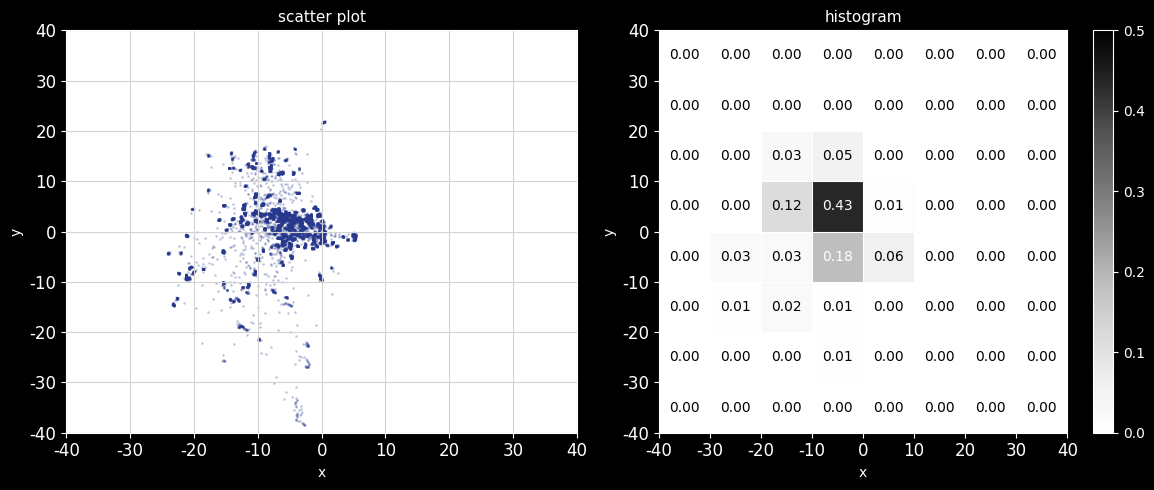

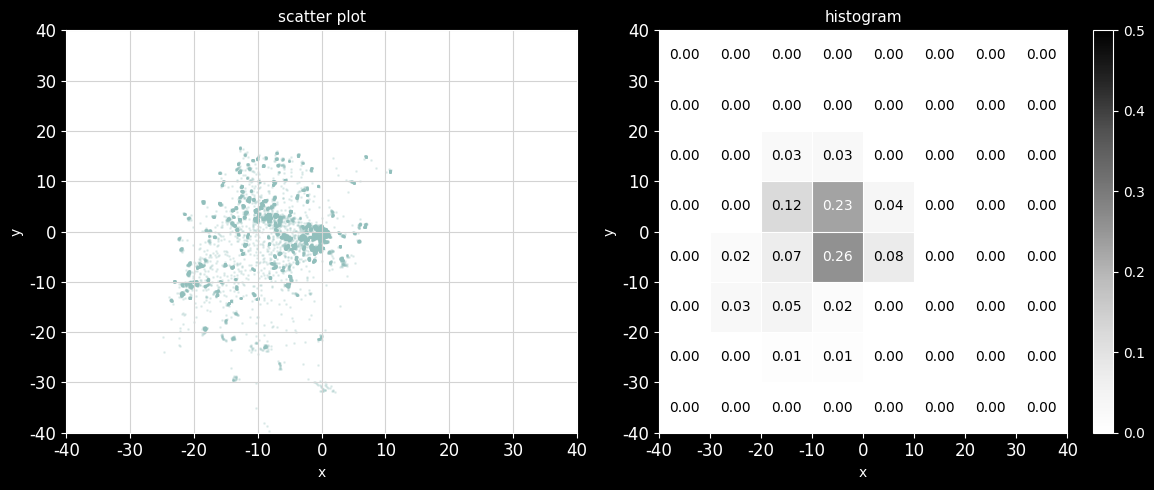

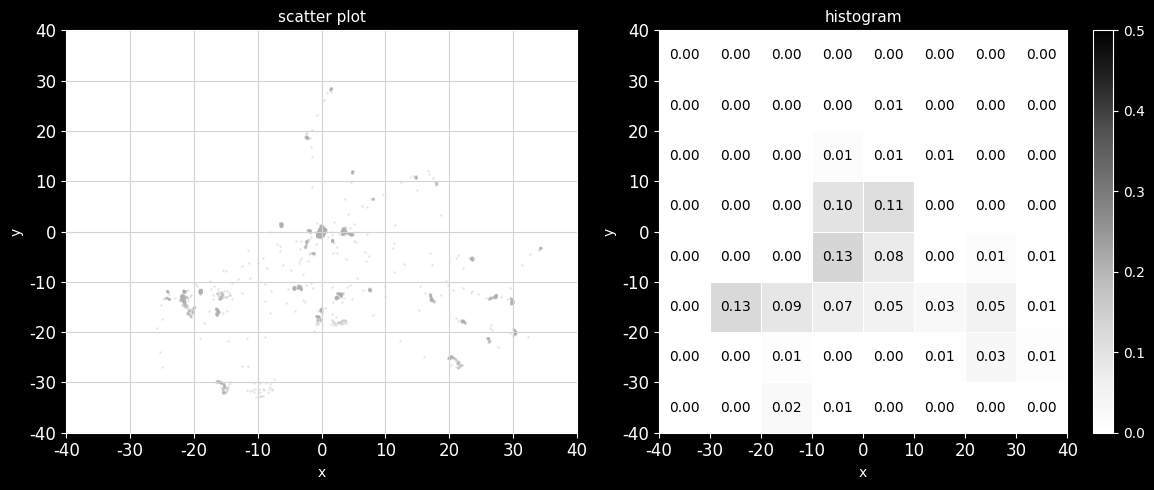

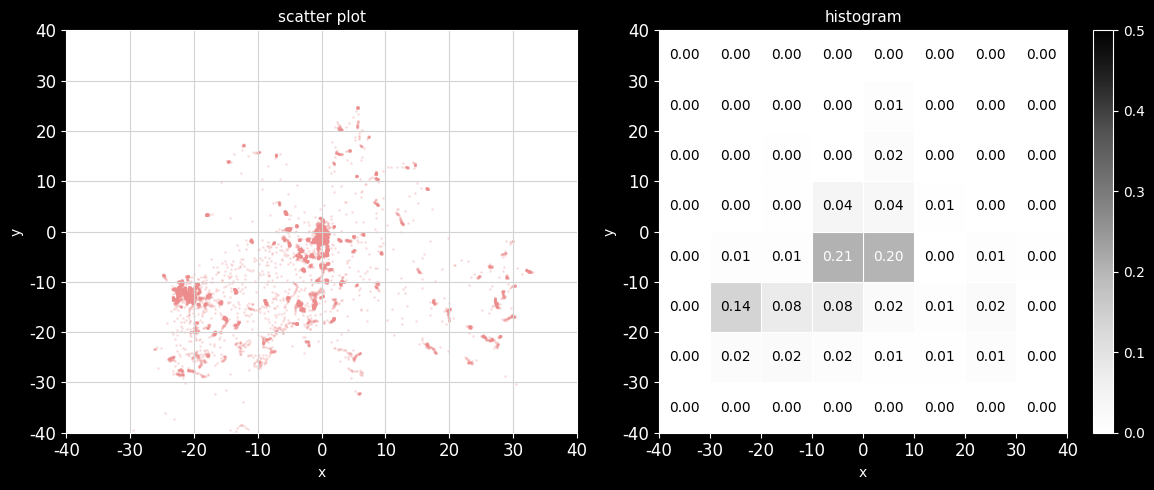

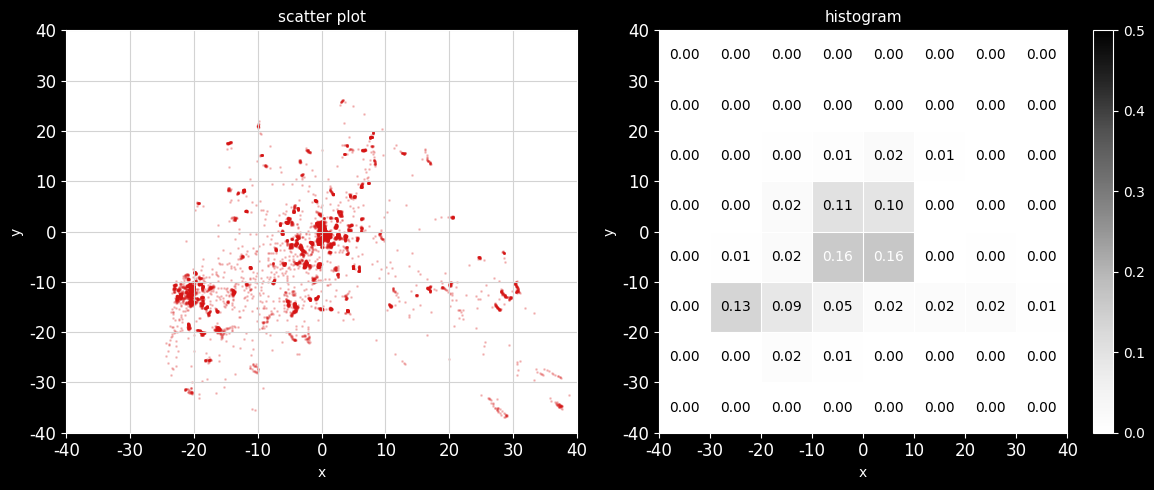

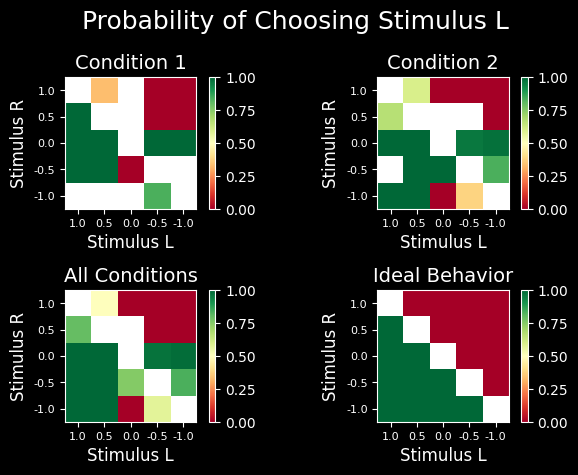

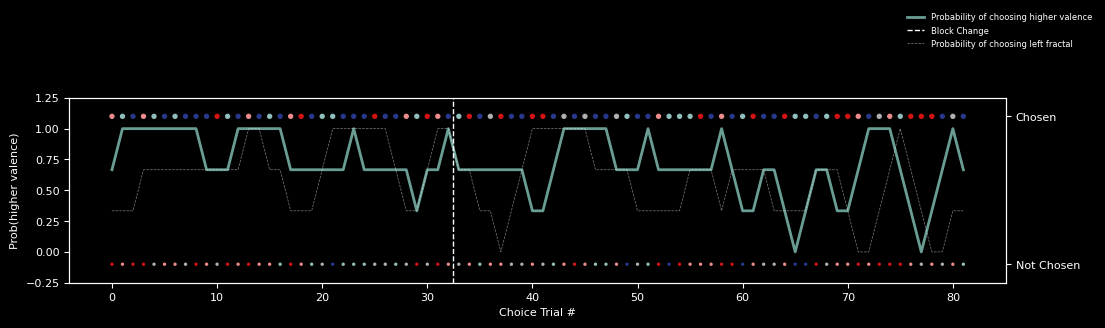


Generating session summary: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/markdowns
  Writing 20230720_Aragorn.md
Writing to excel...


In [81]:
plt.style.use('dark_background')
from analyses.run_functions import run_functions

# dates = [date for date in dates if date not in ['230607', '230609']]
dates = session_df['date'].unique()
for date in dates:
	session_df_date = session_df[session_df['date'] == date]
	session_obj = run_functions(session_df_date, session_obj, path_obj, 
														  behavioral_code_dict, error_dict)

## Comparing Reinforcement and Choice Trial Performance

In [82]:
from analyses import print_performance
print_performance.print_performance(session_df)

Session Performance
 Percent successful reinforcement trials: 0.955 (339/355)
   Valence 1.0: 1.0 (70/70)
   Valence 0.5: 0.952 (79/83)
   Valence 0.0: 0.971 (33/34)
   Valence -0.5: 0.965 (82/85)
   Valence -1.0: 0.904 (75/83)
 Percent successful choice trials: 0.672 (82/122)
   Valence Pair [0.0, 0.5]: 1.0 (4/4)
   Valence Pair [-1.0, 0.5]: 1.0 (4/4)
   Valence Pair [-0.5, 0.5]: 0.8 (4/5)
   Valence Pair [-1.0, 0.0]: 0.75 (6/8)
   Valence Pair [0.5, 1.0]: 0.72 (18/25)
   Valence Pair [-0.5, 1.0]: 0.636 (7/11)
   Valence Pair [0.0, 1.0]: 0.615 (8/13)
   Valence Pair [-1.0, -0.5]: 0.606 (20/33)
   Valence Pair [-0.5, 0.0]: 0.6 (6/10)
   Valence Pair [-1.0, 1.0]: 0.556 (5/9)
 Percent left choice trials: 0.598 (49/82)
 Percent higher valence choice trials: 0.72 (59/82)
   Valence Pair [-0.5, 0.5]: 1.0 (4/4)
   Valence Pair [-1.0, 1.0]: 1.0 (5/5)
   Valence Pair [0.0, 0.5]: 1.0 (4/4)
   Valence Pair [-0.5, 1.0]: 1.0 (7/7)
   Valence Pair [0.0, 1.0]: 1.0 (8/8)
   Valence Pair [-1.0, 0.5]: 

### Reaction Time on Choice Trials

In [79]:
print_performance.reaction_time_choice(session_df)

Reaction Time on Choice Trials
 Valence: -1.0
   Reaction Time: 440.714
   Valence Not Chosen: -0.5 438.25 (4)
   Valence Not Chosen: 0.0 399.0 (2)
   Valence Not Chosen: 1.0 534.0 (1)
 Valence: -0.5
   Reaction Time: 443.812
   Valence Not Chosen: -1.0 480.0 (9)
   Valence Not Chosen: 0.0 405.5 (4)
   Valence Not Chosen: 0.5 386.333 (3)
 Valence: 0.0
   Reaction Time: 437.286
   Valence Not Chosen: -1.0 436.143 (7)
   Valence Not Chosen: -0.5 470.667 (3)
   Valence Not Chosen: 0.5 414.25 (4)
 Valence: 0.5
   Reaction Time: 396.03
   Valence Not Chosen: -1.0 396.188 (16)
   Valence Not Chosen: -0.5 390.818 (11)
   Valence Not Chosen: 0.0 405.167 (6)
 Valence: 1.0
   Reaction Time: 419.207
   Valence Not Chosen: -1.0 394.5 (18)
   Valence Not Chosen: -0.5 470.692 (13)
   Valence Not Chosen: 0.0 403.667 (12)
   Valence Not Chosen: 0.5 416.667 (15)


In [80]:
session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
session_df_reinforcement.groupby(['valence'])\
              [['lick_duration',
                'blink_duration_offscreen',
                'pupil_raster_window_avg',
                'blink_duration_window',
                'eye_distance']].mean()

lick_duration  blink_duration_offscreen  pupil_raster_window_avg   
valence                                                                     
-1.0          0.394321                  0.558824                 0.118433  \
-0.5          0.337433                  0.546321                 0.089526   
 0.0          0.394490                  0.429686                 0.090078   
 0.5          0.587862                  0.419479                 0.049976   
 1.0          0.680000                  0.582717                 0.019034   

         blink_duration_window  eye_distance  
valence                                       
-1.0                  0.147329    114.164715  
-0.5                  0.113731     77.475119  
 0.0                  0.127190     80.650131  
 0.5                  0.065278     65.416827  
 1.0                  0.032700     54.408874

In [81]:
session_df_reinforcement.groupby(['condition', 'fractal_chosen'])\
              [['valence', 'fractal_count_in_block', 'lick_duration',
                'blink_duration_offscreen',
                'pupil_raster_window_avg',
                'blink_duration_window',
                'eye_distance']].mean()

valence  fractal_count_in_block  lick_duration   
condition fractal_chosen                                                   
1         _fractal_A          1.0               19.285714       0.645000  \
          _fractal_B          0.5               20.833333       0.594750   
          _fractal_C          0.0               17.217391       0.446696   
          _fractal_D         -0.5               24.068966       0.366345   
          _fractal_E         -1.0               22.071429       0.386036   
2         _fractal_A         -0.5               22.129032       0.310387   
          _fractal_B         -1.0               20.320000       0.403600   
          _fractal_C          0.0               17.576923       0.348308   
          _fractal_D          1.0               18.692308       0.708269   
          _fractal_E          0.5               22.379310       0.579310   

                          blink_duration_offscreen  pupil_raster_window_avg   
condition fractal_chosen                                                      
1         _fractal_A                      0.729634                 0.035348  \
          _fractal_B                      0.407372                 0.034594   
          _fractal_C                      0.401739                 0.052074   
          _fractal_D                      0.594562                 0.078408   
          _fractal_E                      0.620962                 0.116813   
2         _fractal_A                      0.501191                 0.099926   
          _fractal_B                      0.489231                 0.120246   
          _fractal_C                      0.454408                 0.123698   
          _fractal_D                      0.464053                 0.005858   
          _fractal_E                      0.434509                 0.069072   

                          blink_duration_window  eye_distance  
condition fractal_chosen                                       
1         _fractal_A                   0.049011     60.450509  
          _fractal_B                   0.043697     61.785447  
          _fractal_C                   0.087893     85.870525  
          _fractal_D                   0.104244     86.847866  
          _fractal_E                   0.133929     87.379496  
2         _fractal_A                   0.122605     68.707065  
          _fractal_B                   0.162338    144.164161  
          _fractal_C                   0.161953     76.032090  
          _fractal_D                   0.019527     49.529092  
          _fractal_E                   0.092069     69.924747

(-40.0, 40.0)

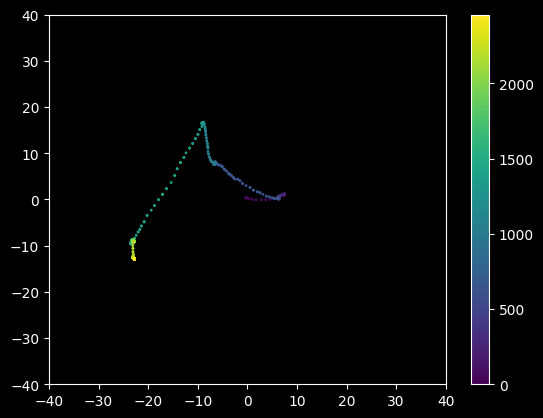

In [29]:
trial_22 = session_df[session_df['trial_num'] == 10]
trial_22_fix_off = trial_22['Fixation Off'].iloc[0]
trial_22_eye_x = trial_22['eye_x'].tolist()[0][trial_22_fix_off:]
trial_22_eye_y = trial_22['eye_y'].tolist()[0][trial_22_fix_off:]
trial_22_fix_off = trial_22['Fixation Off'].iloc[0]
# show heat map
plt.scatter(trial_22_eye_x, trial_22_eye_y, c=np.arange(len(trial_22_eye_x)), cmap='viridis', s=1)
plt.colorbar()
plt.xlim(-40, 40)
plt.ylim(-40, 40)

Block: 1
  Valence 1.0: Lick Correlation: 0.069 | Blink Correlation: 0.236
  Valence 0.5: Lick Correlation: 0.022 | Blink Correlation: 0.002
  Valence 0.0: Lick Correlation: 0.34 | Blink Correlation: -0.218
  Valence -0.5: Lick Correlation: 0.026 | Blink Correlation: -0.041
  Valence -1.0: Lick Correlation: -0.262 | Blink Correlation: 0.407
Block: 2
  Valence 1.0: Lick Correlation: 0.226 | Blink Correlation: 0.143
  Valence 0.5: Lick Correlation: -0.475 | Blink Correlation: 0.261
  Valence 0.0: Lick Correlation: -0.413 | Blink Correlation: 0.147
  Valence -0.5: Lick Correlation: -0.076 | Blink Correlation: -0.203
  Valence -1.0: Lick Correlation: -0.492 | Blink Correlation: 0.399


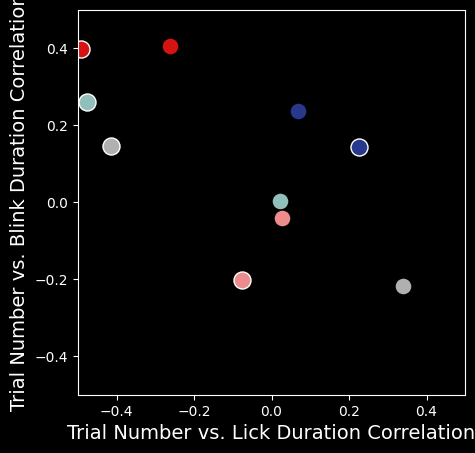

: 

In [82]:
def trialno_lick_blink_correlation(df, session_obj):
  f, ax = plt.subplots(1, 1, figsize=(5, 5))
  df_threshold = df[df['fractal_count_in_block'] > 10]
  for block in df_threshold['condition'].unique():
    df_block = df_threshold[df_threshold['condition'] == block]
    print(f'Block: {block}')
    for valence in sorted(df_block['valence'].unique(), reverse=True):
      df_block_valence = df_block[df_block['valence'] == valence]
      trialno_lick_corr = round(df_block_valence['fractal_count_in_block'].corr(df_block_valence['lick_duration']), 3)
      trial_no_blink_corr = round(df_block_valence['fractal_count_in_block'].corr(df_block_valence['blink_duration_window']), 3)
      print(f'  Valence {valence}: Lick Correlation: {trialno_lick_corr} | Blink Correlation: {trial_no_blink_corr}')
      ec = 'black' if block == 1 else 'white'
      ax.scatter(trialno_lick_corr, trial_no_blink_corr, s=150,
                label=None, 
                color=session_obj.valence_colors[valence], ec=ec)
      ax.set_xlabel('Trial Number vs. Lick Duration Correlation', fontsize=14)
      ax.set_ylabel('Trial Number vs. Blink Duration Correlation', fontsize=14)
  ax.set_xlim(-0.5, 0.5)
  ax.set_ylim(-0.5, 0.5)
  plt.show()
    
trialno_lick_blink_correlation(session_df_correct, session_obj)

***
## Exploratory Analysis
### High Lick + Low DEM/Blink Trials

In [76]:
session_df_correct.loc[(session_df_correct['blink_in_window'] == 0) & 
											 (session_df_correct['eye_distance'] < 100) &
											 (session_df_correct['lick_duration'] > 0.75)]

Empty DataFrame
Columns: [date, session_num, subject, trial_num, block, condition, correct, error, error_type, behavioral_code_markers, behavioral_code_times, stimuli_name_1, x_1_pos, y_1_pos, stimuli_name_2, x_2_pos, y_2_pos, reward_1, reward_prob_1, reward_mag_1, reward_drops_1, reward_length_1, reward_2, reward_prob_2, reward_mag_2, airpuff_1, airpuff_prob_1, airpuff_mag_1, airpuff_2, airpuff_prob_2, airpuff_mag_2, eye_x, eye_y, eye_pupil, lick, cam_frame, cam_save, photodiode, trial_start, trial_datetime_start, trial_datetime_end, reinforcement_trial, choice_trial, stim_chosen, stim_2_chosen, fractal_chosen, reward, reward_mag, airpuff, airpuff_mag, cam1_trial_name, cam2_trial_name, cam1_trial_time, cam2_trial_time, cam1_video, cam2_video, Start Trial, Fixation On, Fixation Success, CS On, Fixation Off, Trace Start, Trace End, Outcome Start, Reward Trigger, Airpuff Trigger, Outcome, Outcome End, Manual Reward, End Trial, valence, valence_1, valence_2, valence_not_chosen, lick_raster, DEM_raster, trial_bins, trial_in_block, fractal_count_in_block, lick_count_window, blink_count_window, pupil_data_window, pupil_raster, pupil_raster_window, pupil_raster_window_avg, pupil_binary_zero, blink_onset, blink_offset, blink_raster, blink_raster_window, blink_duration_window, pupil_pre_CS, lick_in_window, blink_in_window, lick_duration, blink_duration_sig, blink_duration_offscreen, eye_distance]
Index: []

### High DEM + Blink + Eye Movement / Low Lick Trials

In [77]:
session_df_correct.loc[(pd.isna(session_df_correct['Manual Reward']) == True) &
											 (session_df_correct['pupil_raster_window_avg'] > 0.2) &
											 (session_df_correct['blink_duration_offscreen'] > 0.30) &
											 (session_df_correct['eye_distance'] > 10) & 
											 (session_df_correct['lick_duration'] < 0.25)]

date  session_num subject  trial_num  block  condition  correct  error   
430  230822            0    Bear        431      2          2        1      0  \

     error_type                            behavioral_code_markers   
430           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...  \

                                 behavioral_code_times stimuli_name_1 x_1_pos   
430  [1499.5938000502065, 1570.786099997349, 1605.1...     _fractal_B  [-5.0]  \

    y_1_pos stimuli_name_2 x_2_pos y_2_pos  reward_1  reward_prob_1   
430   [0.0]     _fractal_A   [5.0]   [0.0]         0            0.0  \

     reward_mag_1  reward_drops_1  reward_length_1  reward_2  reward_prob_2   
430           0.0             0.0              0.0         0            0.0  \

     reward_mag_2  airpuff_1  airpuff_prob_1  airpuff_mag_1  airpuff_2   
430           0.0          1             1.0            1.0          1  \

     airpuff_prob_2  airpuff_mag_2   
430             1.0            0.5  \

                                                 eye_x   
430  [-9.718727434142714, -9.713684894491635, -9.71...  \

                                                 eye_y   
430  [-12.680045993589623, -12.68007098529206, -12....  \

                                             eye_pupil   
430  [7574.0, 7574.0, 7574.0, 7573.0, 7573.0, 7573....  \

                                                  lick   
430  [0.014802852615246373, 0.004280381416606555, 0...  \

                                             cam_frame   
430  [3.323134258846213, 3.3152423918025193, 3.3178...  \

                                              cam_save   
430  [3.314913564011345, 3.313598252848495, 3.32477...  \

                                            photodiode   trial_start   
430  [0.5228408434731109, 0.5162643005973823, 0.531...  2.444949e+06  \

       trial_datetime_start      trial_datetime_end  reinforcement_trial   
430 2023-08-22 14:10:07.961 2023-08-22 14:10:08.392                    0  \

     choice_trial  stim_chosen  stim_2_chosen fractal_chosen  reward   
430             1            2              1     _fractal_B       0  \

     reward_mag  airpuff  airpuff_mag  cam1_trial_name  cam2_trial_name   
430         0.0        1          1.0              NaN              NaN  \

     cam1_trial_time  cam2_trial_time  cam1_video  cam2_video  Start Trial   
430              NaN              NaN         NaN         NaN         1570  \

     Fixation On Fixation Success CS On Fixation Off Trace Start Trace End   
430         1605             2395  2412         2635        3013      4506  \

    Outcome Start Reward Trigger Airpuff Trigger Outcome Outcome End   
430          4511           <NA>            4522    <NA>        9008  \

    Manual Reward  End Trial  valence  valence_1  valence_2   
430          <NA>       9041     -1.0       -1.0       -0.5  \

     valence_not_chosen                                        lick_raster   
430                -0.5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  \

                                            DEM_raster  trial_bins   
430  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...        9058  \

     trial_in_block  fractal_count_in_block   
430              71                       9  \

                                     lick_count_window   
430  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  \

                                    blink_count_window   
430  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...  \

                                     pupil_data_window   
430  [6806.0, 6806.0, 6806.0, 6813.0, 6813.0, 6813....  \

                                          pupil_raster   
430  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  \

                                   pupil_raster_window   
430  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  \

     pupil_raster_window_avg  pupil_binary_zero   blink_onset  blink_offset   
430                 0.229231                1.0  [3208, 4776]  [3579, 507

In [78]:
# get correlation between two columns 'pupil_raster_window_avg' and 'blink_duration'
print('Lick vs. DEM Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_offscreen']), 3))
print('Lick vs. Blink Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_window']), 3))
print('DEM vs. Blink Correlation', round(session_df_correct['blink_duration_offscreen'].corr(session_df_correct['blink_duration_window']), 3))
print('Pupil 0 vs. Blink Correlation', round(session_df_correct['pupil_raster_window_avg'].corr(session_df_correct['blink_duration_window']), 3))

Lick vs. DEM Correlation -0.07
Lick vs. Blink Correlation -0.288
DEM vs. Blink Correlation 0.11
Pupil 0 vs. Blink Correlation 0.895


***
### Video Test

In [40]:
trial_specified = 10
session_df_correct[session_df_correct['trial_num'] == trial_specified]\
  [['reinforcement_trial', 'valence', 'fractal_chosen', 'reward_mag', 'airpuff_mag', 'lick_duration', 'blink_duration_offscreen', 'pupil_raster_window_avg', 'blink_duration_window']]


reinforcement_trial  valence fractal_chosen  reward_mag  airpuff_mag   
9                    0      0.0     _fractal_C         0.0          0.0  \

   lick_duration  blink_duration_offscreen  pupil_raster_window_avg   
9          0.549                  0.654615                      0.0  \

   blink_duration_window  
9                    0.0

In [11]:
video_path = session_df['e3v8360'].iloc[115]
frames = session_df['cam_frames'].iloc[115]

# see number of frames in video
print('  Number of frames in TTL: {}'.format(len(frames)))

# open video file and count frames
cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('  Number of frames in video: {}'.format(frame_count))

KeyError: 'e3v8360'

In [ ]:
from analyses.video_parsing_external import video_parsing_external
trial_specified = 10
session_df_correct = session_df[session_df['correct'] == 1]
video_parsing_external(session_df_correct, session_obj, trial_specified=trial_specified)

***
## Single Trial Analysis

In [1]:
session_df_selected = session_df_correct[session_df_correct['trial_num'] == 179]
session_df_selected[['valence',
										 'lick_duration',
										 'blink_duration_sig',
										 'blink_duration_offscreen',
										 'pupil_raster_window_avg',
                  	 'blink_duration_window',
										 'eye_distance',
										 'Outcome Start',
										 'Reward Trigger',
										 'Airpuff Trigger'
]]

NameError: name 'session_df_correct' is not defined

In [139]:
from eyetracking_analysis import eyetracking_analysis
eyetracking_analysis(session_df_selected, session_obj, TRIAL_THRESHOLD=None)

ModuleNotFoundError: No module named 'eyetracking_analysis'

***
## Video Analysis

In [112]:
import matplotlib.pyplot as plt
from plot_helper import set_plot_params

def eye_data_delay(row, trace_window):
	delay_end = row['Trace End']
	eye_x = row['eye_x'][delay_end-trace_window:delay_end]
	eye_y = row['eye_y'][delay_end-trace_window:delay_end]
	row['eye_x_delay'] = eye_x
	row['eye_y_delay'] = eye_y
	return row

def eye_outside_threshold(row):
	blink_count_window = row['blink_count_window']
	eye_x = row['eye_x_delay']
	eye_y = row['eye_y_delay']
	try:
		# print(list(zip(eye_x, eye_y, blink_raster)))
		eye_x_threshold = [x for x_index, x in enumerate(eye_x)
												if blink_count_window[x_index] == 1]
		eye_y_threshold = [y for y_index, y in enumerate(eye_y)
												if blink_count_window[y_index] == 1]
	except:
		eye_x_threshold = []
		eye_y_threshold = []
	row['eye_x_threshold'] = eye_x_threshold
	row['eye_y_threshold'] = eye_y_threshold
	return row

def eye_signal_delay(row, session_obj):
	eye_blink_signal = session_obj.blink_signal
	BLINK_SIGNAL = [(eye_blink_signal['eye_x_min'], eye_blink_signal['eye_y_min']),
									(eye_blink_signal['eye_x_max'], eye_blink_signal['eye_y_max'])]
	eye_x = row['eye_x_delay']
	eye_y = row['eye_y_delay']
	blink_count = [1 if (x,y) in BLINK_SIGNAL else 0 
									for (x,y) in zip(eye_x, eye_y)]
	eye_x_threshold = [x for x_index, x in enumerate(eye_x)
											if blink_count[x_index] == 0]
	eye_y_threshold = [y for y_index, y in enumerate(eye_y)
											if blink_count[y_index] == 0]

	row['eye_x_sig'] = eye_x_threshold
	row['eye_y_sig'] = eye_y_threshold

	return row

def plot_eye_data(session_df, session_obj):
	import seaborn as sns

	# trial_numbers = input('Enter trial numbers to plot (e.g. 1,2,3...{}): '.format(len(session_df)))
	# row = session_df.iloc[int(trial_numbers)]
	# trial_numbers = list(row.index)
	COLORS = session_obj.valence_colors
	session_df = session_df.apply(eye_data_delay, 
					trace_window = session_obj.window_blink, axis=1)
	session_df = session_df.apply(eye_outside_threshold, axis=1)
	session_df = session_df.apply(eye_signal_delay, 
															  session_obj=session_obj,
																axis=1)
	for v_index, valence in enumerate(sorted(session_df['valence'].unique(), reverse=True)):
		set_plot_params(FONT=12,
										AXES_TITLE=16,
										AXES_LABEL=18, 
										TICK_LABEL=12, 
										LEGEND=10, 
										TITLE=20)
		f, ax = plt.subplots(1, 1, figsize=(10, 10))
		df = session_df[session_df['valence'] == valence]
		for index, row in df.iterrows():
			x = row['eye_x_delay']
			y = row['eye_y_delay']
			z = list(range(len(row['eye_x_delay'])))
			scatterplot = ax.scatter(x, y, c=z, cmap='viridis', s=1)
		
		eye_x = df['eye_x_delay'].tolist()
		eye_y = df['eye_y_delay'].tolist()
		x_flatten = [item for sublist in eye_x for item in sublist]
		y_flatten = [item for sublist in eye_y for item in sublist]
		# ax2.hist2d(x_flatten, y_flatten, bins=100, cmap='viridis', 
		# 							range=[[-100, 100], [-100, 100]], 
		# 							density=True)
		sns.jointplot(x=x_flatten, 
									y=y_flatten, 
									color=COLORS[v_index],
									xlim = (-100,100),
									ylim = (-100,100))

		ax.set_title('Valence: {}'.format(valence))
		ax.set_xlim([-100, 100])
		ax.set_ylim([-100, 100])
		f.colorbar(scatterplot, ax=ax)

TRIAL_THRESHOLD = 10
# only include trials after subject has seen fractal <TRIAL_THRESHOLD> number of times
session_df_count = session_df_correct[session_df_correct['fractal_count_in_block'] > TRIAL_THRESHOLD]
plot_eye_data(session_df_count, session_obj)

ModuleNotFoundError: No module named 'plot_helper'

In [ ]:
for valence in sorted(session_df_correct['valence'].unique()):

  session_valence = session_df_correct[session_df_correct['valence'] == valence]
  # iterate through trials
  f, axarr = plt.subplots(3, 4, figsize=(10, 5))
  # empty matrix of zeros
  lick_matrix_cs = np.zeros((len(session_valence), 350))
  lick_matrix_trace = np.zeros((len(session_valence), 1000))
  lick_matrix_outcome = np.zeros((len(session_valence), 1000))
  blink_matrix_cs = np.zeros((len(session_valence), 350))
  blink_matrix_trace = np.zeros((len(session_valence), 1000))
  blink_matrix_outcome = np.zeros((len(session_valence), 1000))
  iter = 0
  for index, row in session_valence.iterrows():
    # get lick/blink raster
    lick_raster = row['lick_raster']
    blink_raster = row['blink_raster']
    # get cs on/off time
    cs_on = row['CS On']
    cs_off = row['Trace Start']
    lick_raster_cs = lick_raster[cs_on:cs_off][-350:]
    blink_raster_cs = blink_raster[cs_on:cs_off][-350:]
    # replace zeros in blink matrix with blink raster
    lick_matrix_cs[iter, :len(lick_raster_cs)] = lick_raster_cs
    blink_matrix_cs[iter, :len(blink_raster_cs)] = blink_raster_cs
    # get trace end/trial end time
    if valence > 0:
      trace_end = row['Reward Trigger']
    elif valence < 0:
      trace_end = row['Airpuff Trigger']
    else:
      trace_end = row['Trace End']
    trial_end = row['End Trial']
    lick_trace = lick_raster[cs_off:trace_end][-1000:]
    blink_trace = blink_raster[cs_off:trace_end][-1000:]
    # replace zeros in blink matrix with blink trace
    lick_matrix_trace[iter, :len(lick_trace)] = lick_trace
    blink_matrix_trace[iter, :len(blink_trace)] = blink_trace
    # get outcome time
    lick_raster_outcome = lick_raster[trace_end:trial_end][:1000]
    blink_raster_outcome = blink_raster[trace_end:trial_end][:1000]
    # replace zeros in blink matrix with blink outcome
    lick_matrix_outcome[iter, :len(lick_raster_outcome)] = lick_raster_outcome
    blink_matrix_outcome[iter, :len(blink_raster_outcome)] = blink_raster_outcome
    iter += 1
  axarr[0][0].imshow(lick_matrix_cs, aspect='auto')
  axarr[1][0].imshow(lick_matrix_trace, aspect='auto')
  axarr[2][0].imshow(lick_matrix_outcome, aspect='auto')
  axarr[0][2].imshow(blink_matrix_cs, aspect='auto')
  axarr[1][2].imshow(blink_matrix_trace, aspect='auto')
  axarr[2][2].imshow(blink_matrix_outcome, aspect='auto')
  # get column average of matrix
  ## cs
  lick_matrix_cs_avg = np.mean(lick_matrix_cs, axis=0)
  blink_matrix_cs_avg = np.mean(blink_matrix_cs, axis=0)
  axarr[0][1].plot(lick_matrix_cs_avg)
  axarr[0][1].set_ylim([0, 1])
  axarr[0][3].plot(blink_matrix_cs_avg)
  axarr[0][3].set_ylim([0, 1])
  ## trace
  lick_matrix_trace_avg = np.mean(lick_matrix_trace, axis=0)
  blink_matrix_trace_avg = np.mean(blink_matrix_trace, axis=0)
  axarr[1][1].plot(lick_matrix_trace_avg)
  axarr[1][1].set_ylim([0, 1])
  axarr[1][3].plot(blink_matrix_trace_avg)
  axarr[1][3].set_ylim([0, 1])
  ## outcome
  lick_matrix_outcome_avg = np.mean(lick_matrix_outcome, axis=0)
  blink_matrix_outcome_avg = np.mean(blink_matrix_outcome, axis=0)
  axarr[2][1].plot(lick_matrix_outcome_avg)
  axarr[2][1].set_ylim([0, 1])
  axarr[2][3].plot(blink_matrix_outcome_avg)
  axarr[2][3].set_ylim([0, 1])
  # set x labels
  axarr[0][0].set_title('Lick Raster')
  axarr[0][1].set_title('Lick Average')
  axarr[0][2].set_title('Blink Raster')
  axarr[0][3].set_title('Blink Average')
  # set y labels
  axarr[0][0].set_ylabel('CS')
  axarr[1][0].set_ylabel('Trace')
  axarr[2][0].set_ylabel('Outcome')
  # use super title to set title over all subplots 
  f.suptitle('Valence: {}'.format(valence), fontsize=22)
  # reduce height of title
  f.tight_layout()
  plt.show()

***
## DeepLabCut

In [19]:
import os
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=Warning)
import deeplabcut

from dlc_primate.dlc_utils import dlc_config
video_path_list = dlc_config.get_trial_video_list(session_df, session_obj.video_path)

Checking for video files...
  Video directory: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos


100%|██████████| 660/660 [00:00<00:00, 41522.16it/s]

Video not found: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos/230717_Aragorn_choice_Cam1_1.mp4
Video not found: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos/230717_Aragorn_choice_Cam1_2.mp4
Video not found: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos/230717_Aragorn_choice_Cam1_3.mp4
Video not found: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos/230717_Aragorn_choice_Cam1_4.mp4
Video not found: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos/230717_Aragorn_choice_Cam1_5.mp4
Video not found: /Users/rahimhashim/Google Drive/My Drive/Columbia/Sal

In [ ]:
from PIL import Image
import cv2

project_name = f'{session_obj.date}_{session_obj.monkey}'
your_name = 'rahim'
model2use = 'primate_face'
# .mp4 or .avi etc.
videotype = os.path.splitext(video_path_list[0])[-1].lstrip('.')

# Check if videos need to be downsampled
downsample_flag = check_for_downsample(video_path_list)

if downsample_flag:
	video_path_list = downsample_videos(video_path_list)

# Create ModelZoo project
config_path, train_config_path = deeplabcut.create_pretrained_project(
    project_name,
    your_name,
    video_path_list[0:1],
    videotype=videotype,
    model=model2use,
    analyzevideo=True,
    createlabeledvideo=True,
    copy_videos=False, # must leave copy_videos=True
)

In [ ]:
# Delete the first video in the config file to rerun with new config
dlc_config.clean_pretrained_project(config_path)

In [ ]:
video_list_subset = video_path_list[:]
# Adding new videos to the config.yaml file
deeplabcut.add_new_videos(config_path, video_list_subset, copy_videos=False, 
            coords=None, extract_frames=False
)

# Analyze specified videos
deeplabcut.analyze_videos(config_path, video_list_subset, 
            videotype, save_as_csv=True
)

# Filter predictions
deeplabcut.filterpredictions(config_path, video_list_subset, videotype=videotype)

# Create labeled videos
deeplabcut.create_labeled_video(
   config_path, video_list_subset, 
   videotype, 
   draw_skeleton=True, 
   filtered=True,
   trailpoints=5,
)

# Plot trajectories
deeplabcut.plot_trajectories(config_path, video_list_subset, videotype, filtered=True)

***
## SpikeGLX 

In [45]:
def cam_frame_counter(trial):
  # count the number of times the value goes from <3 to greater than 3
  frame_timings = []
  cam_save_signal = trial['cam_save']
  trial_num = trial['trial_num']
  for i in range(len(trial['cam_frame'])):
    if trial['cam_frame'][i] > 3 and trial['cam_frame'][i-1] < 3 and cam_save_signal[i] > 3:
      frame_timings.append(i)
  # print(trial_num, len(frame_timings), len(trial['cam_frame']), 
  #   'frame rate: {}'.format(round(len(frame_timings)/len(trial['cam_frame']), 3)*1000))
  return frame_timings
session_df['cam_frames'] = session_df.apply(cam_frame_counter, axis=1)


In [6]:
signal_dict = {
  0: 'cam_sync',
  1: 'cam_save',
  2: 'lick',
  3: 'photodiode'
}

In [7]:
from spike_glx import read_SGLX
meta, chan_dict = read_SGLX.read_SGLX()

Select binary file


2023-08-29 10:55:16.922 python[73375:3014890] +[CATransaction synchronize] called within transaction


Bin File Path: /Users/rahimhashim/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice/aragorn_20230823_g0/aragorn_20230823_g0_t0.nidq.bin
File Name: C:/Users/Penfield/Desktop/Rahim/SpikeGLX/aragorn_20230823_g0/aragorn_20230823_g0_t0.nidq.bin
  Number of Channels: 5
  File Created: 2023-08-23T15:33:10
  File Length: 6681.75245438931
nChan: 5, nFileSamp: 141562552


Sample Rate:  21186.440678
 Channel:  0
  Max Val: 3341.522216796875
  Min Val: -5.79833984375
 Channel:  1
  Max Val: 3356.170654296875
  Min Val: -21.209716796875
 Channel:  2
  Max Val: 4999.847412109375
  Min Val: -26.85546875
 Channel:  3
  Max Val: 2285.003662109375
  Min Val: 503.692626953125
 Channel:  4
  Max Val: 0.0
  Min Val: 0.0


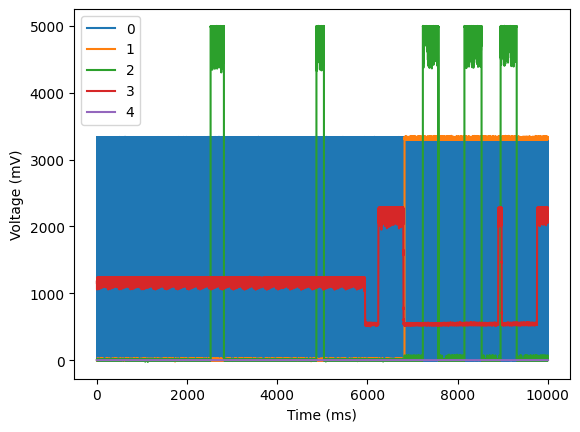

In [8]:
sample_rate, data_times, chan_dict_corrected = \
  read_SGLX.plot_channels(meta, chan_dict, tStart=0, tEnd=10)

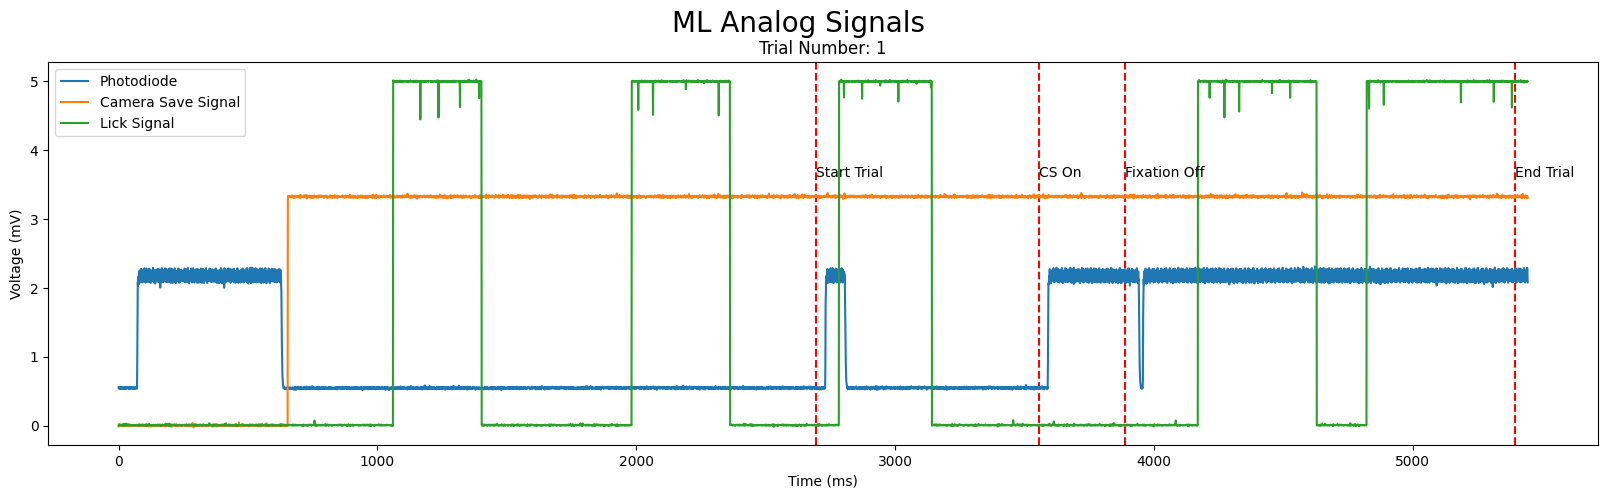

In [23]:
def plot_analog_ML(df, trial_num):
  f, ax = plt.subplots(figsize=(20, 5))
  trial_selected = df[df['trial_num'] == trial_num]
  trial_selected[['trial_num', 'photodiode', 'cam_frame', 'cam_save']]
  photodiode_selected = trial_selected['photodiode'].tolist()[0]
  cam_signal = trial_selected['cam_frame'].tolist()[0]
  save_signal = trial_selected['cam_save'].tolist()[0]
  lick_signal = trial_selected['lick'].tolist()[0]
  epochs = ['Start Trial', 'CS On',	'Fixation Off',	
            'Trace Start', 'Outcome Start', 'End Trial']
  for epoch in epochs:
    epoch_time = trial_selected[epoch].tolist()[0]
    try:
      ax.axvline(x=epoch_time, color='r', linestyle='--')
      ax.text(epoch_time, max(cam_signal)+0.25, epoch)
    except:
      pass
  ax.plot(photodiode_selected, label='Photodiode')
  ax.plot(save_signal, label='Camera Save Signal')
  ax.plot(lick_signal, label='Lick Signal')
  ax.set_xlabel('Time (ms)')
  ax.set_ylabel('Voltage (mV)')
  plt.suptitle('ML Analog Signals', fontsize=20)
  # space between sup title and title
  plt.subplots_adjust(top=0.875)
  ax.set_title(f'Trial Number: {trial_num}')
  plt.legend()
  plt.show()

plot_analog_ML(session_df, trial_num=1)

In [44]:
session_df['cam_frame'].iloc[0]

array([ 5.62747098e-06,  5.26686309e-03, -2.95381758e-03, ...,
        9.21278980e-03,  3.29389974e-03,  3.31261177e+00])

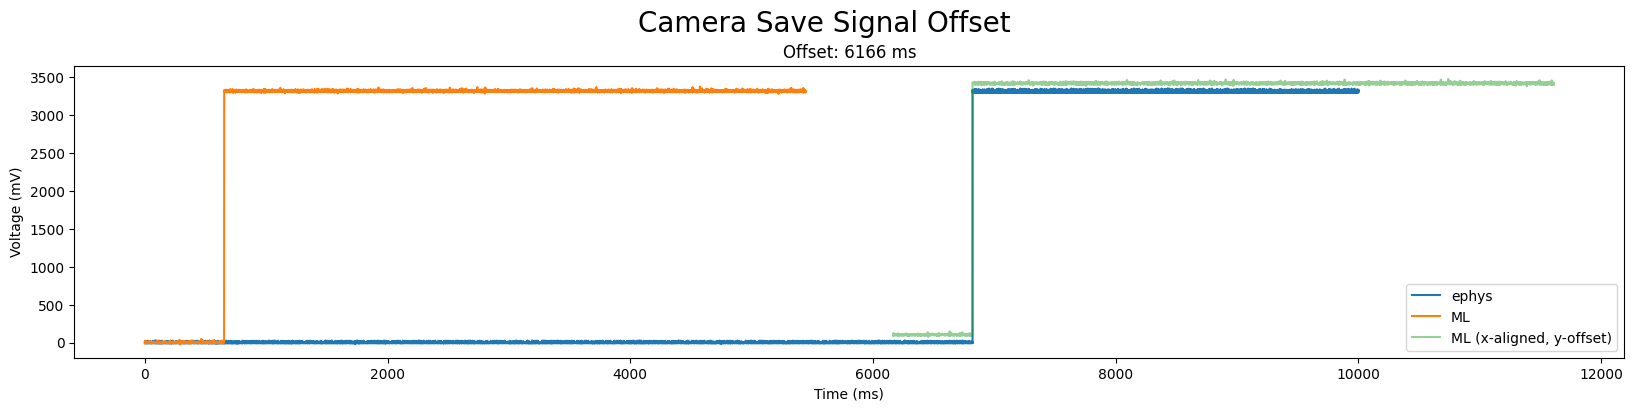

ML Offset: 6166


In [36]:
def session_start_offset(df, chan_dict_corrected):
	f, ax = plt.subplots(1, 1, figsize=(20, 4))
	cam_save = session_df['cam_save'].iloc[0]
	ax.plot(data_times, chan_dict_corrected[1], label='ephys')
	ax.plot(np.array(cam_save)*1000, label='ML')

	save_high_ephys = np.where(chan_dict_corrected[1] > 1000)[0]
	# get data_times corresponding to save_high_ephys
	save_high_ephys_times = [data_times[i] for i in save_high_ephys][0]
	save_high_ML_times = np.where(np.array(cam_save)*1000 > 1000)[0][0]

	offset = save_high_ephys_times - save_high_ML_times
	ax.plot(np.arange(len(cam_save))+offset, 
					(np.array(cam_save)*1000)+100, 
					alpha=0.5,
					label='ML (x-aligned, y-offset)')
	plt.xlabel('Time (ms)')
	plt.ylabel('Voltage (mV)')
	plt.suptitle('Camera Save Signal Offset', fontsize=20)
	plt.title(f'Offset: {round(offset)} ms')
	plt.subplots_adjust(top=0.84)
	plt.legend()
	plt.show()
	print(f'ML Offset: {round(offset)}')

session_start_offset(session_df, chan_dict_corrected)

Trial Start: 6166
Trial End: 11611


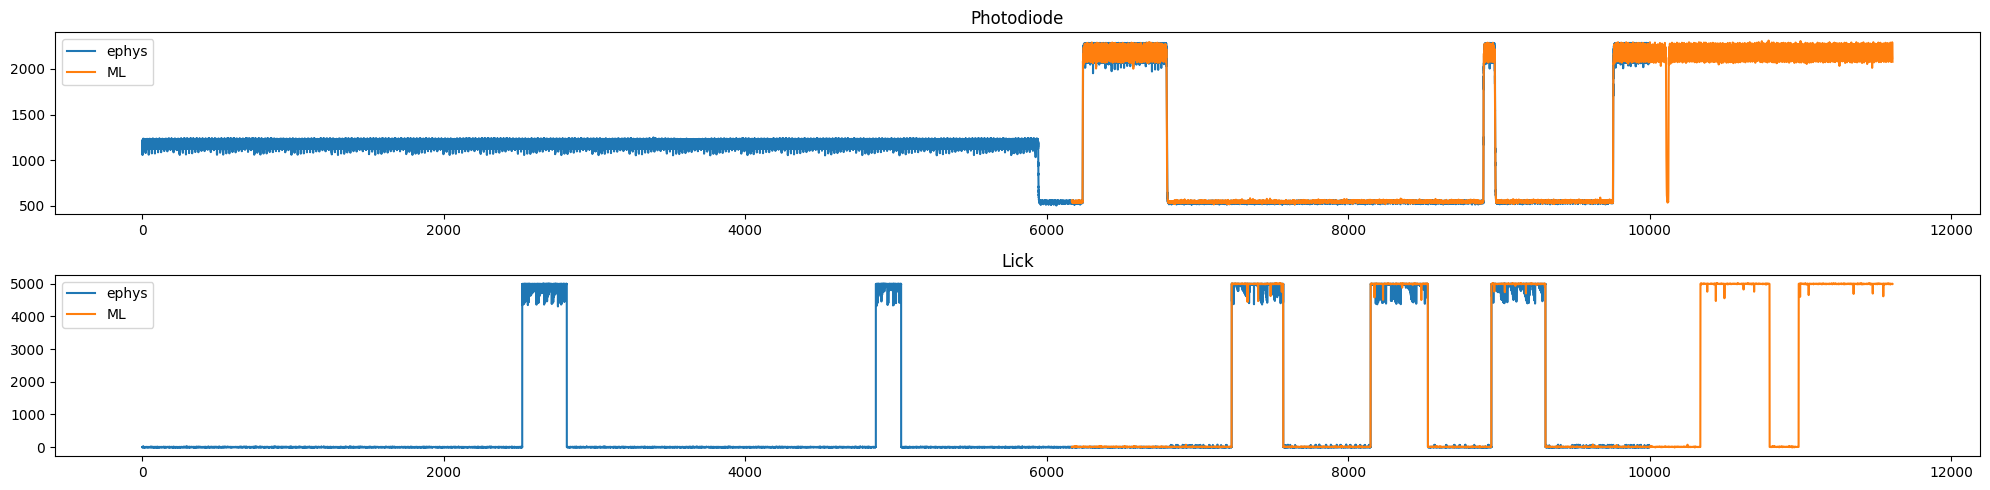

In [42]:
f, axarr = plt.subplots(2, 1, figsize=(20, 5))
# photodiode
axarr[0].plot(data_times, chan_dict_corrected[3], label='ephys')
lick_signal = session_df['photodiode'].iloc[0].tolist()
axarr[0].plot(np.arange(len(lick_signal)) + offset, np.array(lick_signal)*1000, label='ML')
axarr[0].legend()
axarr[0].set_title('Photodiode')
# lick
axarr[1].plot(data_times, chan_dict_corrected[2], label='ephys')
lick_signal = session_df['lick'].iloc[0].tolist()
axarr[1].plot(np.arange(len(lick_signal)) + offset, np.array(lick_signal)*1000, label='ML')
axarr[1].legend()
axarr[1].set_title('Lick')
trial_start = list(np.arange(len(lick_signal)) + offset)[0] 
trial_end = list(np.arange(len(lick_signal)) + offset)[-1]
print(f'Trial Start: {round(trial_start)}')
print(f'Trial End: {round(trial_end)}')
plt.tight_layout()
plt.show()

In [74]:
def time_to_samples(data_array, sample_rate, data_times, tStart, tEnd):
  '''
  Converts time in milliseconds to samples
  from SpikeGLX data
  '''
  first_sample = int(sample_rate*tStart/1000)
  last_sample = int(sample_rate*tEnd/1000)
  data_array = data_array[first_sample:last_sample]
  data_times = data_times[first_sample:last_sample]
  return data_array, data_times

Text(0.5, 1.0, 'Camera Sync')

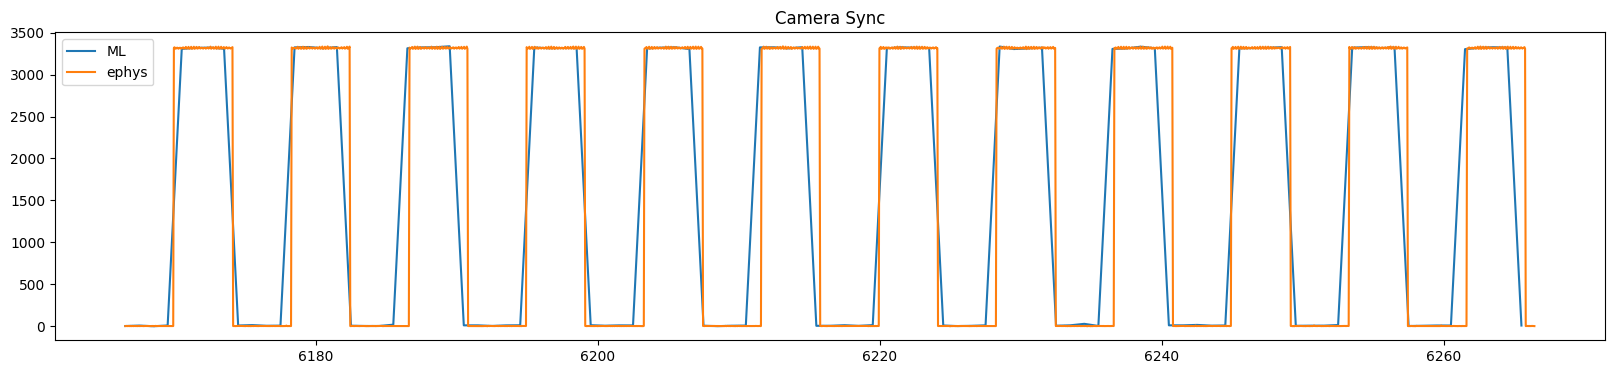

In [77]:
# align cam_sync
f, ax = plt.subplots(1, 1, figsize=(20, 4))
cam_sync = session_df['cam_frame'].iloc[0].tolist()
time_ms = 100
ax.plot(np.arange(len(cam_sync))[:time_ms] + offset, np.array(cam_sync)[:time_ms]*1000, label='ML')
data_array_selected, data_times_selected = time_to_samples(chan_dict_corrected[0], 
                                                           sample_rate, 
                                                           data_times, 
                                                           tStart=trial_start, 
                                                           tEnd=trial_start+time_ms)

ax.plot(data_times_selected, data_array_selected, label='ephys')
ax.legend()
ax.set_title('Camera Sync')

In [13]:
def check_save_low(trial):
  # check if save signal is low for the entire trial
  cam_save_signal = trial['cam_save']
  if min(cam_save_signal) < 1:
    return 1
  else:
    return 0

session_df['save_low'] = session_df.apply(check_save_low, axis=1)
session_df_save_low = session_df[session_df['save_low'] == 1]
session_df_save_low

date  session_num  subject  trial_num  block  condition  correct   
0    230823            0  Aragorn          1      1          1        0  \
667  230823            0  Aragorn        668      2          2        0   

     error  error_type                behavioral_code_markers   
0        1           4  [9, 100, 101, 102, 103, 104, 113, 18]  \
667      1           1                 [9, 100, 101, 113, 18]   

                                 behavioral_code_times stimuli_name_1 x_1_pos   
0    [2.4067999329417944, 2696.0174000123516, 2771....     _fractal_E   [0.0]  \
667  [1465.7033999683335, 1535.8322999672964, 1568....     _fractal_E   [0.0]   

    y_1_pos stimuli_name_2 x_2_pos y_2_pos  reward_1  reward_prob_1   
0     [0.0]     _fractal_E   [0.0]   [0.0]         0            0.0  \
667   [0.0]     _fractal_E   [0.0]   [0.0]         1            1.0   

     reward_mag_1  reward_drops_1  reward_length_1  reward_2  reward_prob_2   
0             0.0             0.0              0.0         0            0.0  \
667           0.5             0.0              0.0         0            0.0   

     reward_mag_2  airpuff_1  airpuff_prob_1  airpuff_mag_1  airpuff_2   
0             0.0          1             1.0            1.0          0  \
667           0.0          0             0.0            0.0          0   

     airpuff_prob_2  airpuff_mag_2   
0               0.0            0.0  \
667             0.0            0.0   

                                                 eye_x   
0    [13.579882803415215, 13.555615318720356, 13.55...  \
667  [124.28999521832031, 124.28999521832031, 124.2...   

                                                 eye_y   
0    [19.810885053110976, 19.81766301651096, 19.817...  \
667  [163.53053768812055, 163.53053768812055, 163.5...   

                                             eye_pupil   
0    [8102.0, 8104.0, 8104.0, 8104.0, 8104.0, 8107....  \
667  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                  lick   
0    [0.0049380358686898496, 0.008555135349968657, ...  \
667  [0.010199271474931215, 0.007568653674124515, 0...   

                                             cam_frame   
0    [5.627470980623661e-06, 0.005266863094622737, ...  \
667  [0.007568653674124515, 0.0049380358686898496, ...   

                                              cam_save   
0    [-0.011174498291353668, 0.0032938997379372836,...  \
667  [3.3182018419314097, 3.3198459808983807, 3.304...   

                                            photodiode   trial_start   
0    [0.5590118290644803, 0.5405975091737123, 0.551...  0.000000e+00  \
667  [2.0374187404322175, 2.2189314050353333, 2.115...  6.613774e+06   

       trial_datetime_start      trial_datetime_end  reinforcement_trial   
0   2023-08-23 15:33:18.267 2023-08-23 15:33:18.268                    1  \
667 2023-08-23 17:23:32.041 2023-08-23 17:23:32.709                    1   

     choice_trial  stim_chosen  stim_2_chosen fractal_chosen  reward   
0               0            5              0         _error       0  \
667             0            5              0         _error       0   

     reward_mag  airpuff  airpuff_mag  cam1_trial_name  cam2_trial_name   
0           0.0        0          0.0              NaN              NaN  \
667         0.0        0          0.0              NaN              NaN   

     cam1_trial_time  cam2_trial_time  cam1_video  cam2_video  Start Trial   
0                NaN              NaN         NaN         NaN         2696  \
667              NaN              NaN         NaN         NaN         1535   

     Fixation On Fixation Success CS On Fixation Off Trace Start Trace End   
0           2771             3527  3556         3890        <NA>      <NA>  \
667         1568             <NA>  <NA>         <NA>        <NA>      <NA>   

    Outcome Start Reward Trigger Airpuff Trigger Outcome Outcome End   
0            <NA>           <NA>            <NA>    <NA>        <NA>  

In [ ]:
import cv2
from analyses.video_parsing_external import get_frames
video_folder = '230810_Bear_0000'
videos = os.listdir(os.path.join(session_obj.video_path, video_folder))
# get frames
video_selected = videos[1]
frames, frame_size = get_frames(os.path.join(session_obj.video_path, video_folder, video_selected))